<h1 style="color:blue; font-size:36px;">Projet Machine Learning 4A</h1>

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')



### <span style="color:blue">**Introduction** </span>

**Le jeu de données "Energy" couvre la période de 2000 à 2020 et fournit des informations détaillées sur la consommation énergétique et la géographie de 176 pays. Avec 3649 observations et 21 variables, telles que l'accès à l'électricité, la part des énergies renouvelables et les émissions de CO2, notre objectif est de prédire la variable "Value-co2-emissions" en utilisant les autres variables disponibles. Dans cette étude, nous chercherons à évaluer les performances des modèles d'apprentissage automatique tels que la régression linéaire, les machines à vecteurs de support (SVM), l'arbre de décision (CART) et Random Forest pour atteindre cet objectif**

### <span style="color:blue">**I. Prétraitement des données** </span>

#### <span style="color:blue">**I.1 Suppression des NAN** </span>

In [63]:
energy=pd.read_csv('global-data-on-sustainable-energy.csv')

**En utilisant la statistique "count", nous remarquons des variations dans le nombre d'observations pour chaque variable, ce qui suggère la présence de données manquantes.**

In [64]:
(energy.isna().sum()/energy.shape[0]*100).sort_values(ascending=False)

Renewables (% equivalent primary energy)                            58.563990
Financial flows to developing countries (US $)                      57.248561
Renewable-electricity-generating-capacity-per-capita                25.513839
Value_co2_emissions_kt_by_country                                   11.729241
gdp_growth                                                           8.687312
gdp_per_capita                                                       7.728145
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          5.672787
Renewable energy share in the total final energy consumption (%)     5.316525
Access to clean fuels for cooking                                    4.631406
Electricity from nuclear (TWh)                                       3.453001
Low-carbon electricity (% electricity)                               1.151000
Electricity from renewables (TWh)                                    0.575500
Electricity from fossil fuels (TWh)                             

**Nous allons procéder à l'élimination des variables "Renewables", "Financial flows to developing countries" et "Renewable-electricity-generating-capacity-per-capita" en raison de leur taux élevé de données manquantes, situé entre 25 % et 60 %. Ensuite, nous filtrerons tous les individus présentant des valeurs non disponibles (NaN) pour les variables restantes. Cette étape nous permettra de conserver 2868 individus avec 18 variables.**

In [65]:
energy.drop(['Renewable-electricity-generating-capacity-per-capita','Financial flows to developing countries (US $)','Renewables (% equivalent primary energy)'],axis=1,inplace=True)

In [66]:
energy.dropna(axis=0,inplace=True)
energy.shape

(2868, 18)

In [67]:
energy.iloc[:,14]=energy.iloc[:,14].str.replace(',','') #on remplace les virgule de la colonne Density par un espace
energy.iloc[:, 14] = pd.to_numeric(energy.iloc[:, 14], errors='coerce')

#### <span style="color:blue">**I.2 Conversion des variables 'Year' et 'Entity'** </span>

In [68]:
energy['Year'] = energy['Year'].astype('category')
energy.rename(columns={energy.columns[14]: 'Density'}, inplace=True)#renommer la colonne Density pour faciliter l'accés à la variable
energy['Density']= pd.to_numeric(energy['Density'], errors='coerce')


In [69]:
# Regrouper les émissions de CO2 par pays
co2_by_country = energy.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum().reset_index()

# Trier les pays par ordre décroissant en fonction des émissions de CO2
co2_by_country_sorted = co2_by_country.sort_values(by='Value_co2_emissions_kt_by_country', ascending=False)

# Afficher les résultats
print(co2_by_country_sorted)

                    Entity  Value_co2_emissions_kt_by_country
27                   China                       1.527328e+08
142          United States                       1.065908e+08
62                   India                       3.267958e+07
68                   Japan                       2.367469e+07
50                 Germany                       1.547289e+07
..                     ...                                ...
35                Djibouti                       2.520000e+03
145                Vanuatu                       2.460000e+03
114  Sao Tome and Principe                       1.860000e+03
71                Kiribati                       1.190000e+03
92                   Nauru                       5.300000e+02

[148 rows x 2 columns]


##### Les 5 pays les plus émetteurs de CO2 sont: La chine, les etats unis,l'inde, le japon et L'Allemagne

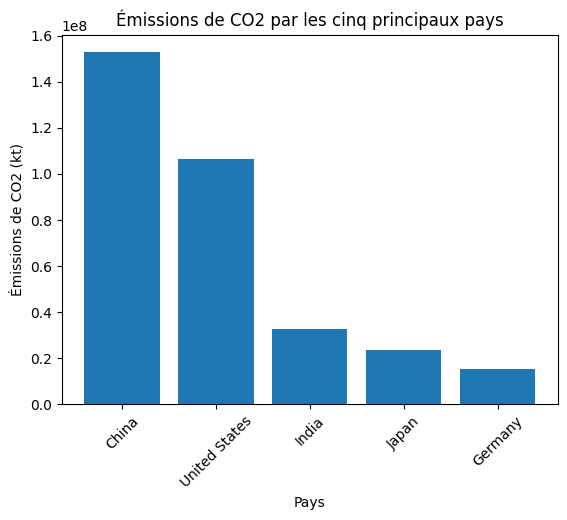

In [70]:
# Sélectionner les cinq principaux pays
top_5_countries = co2_by_country_sorted.head(5)

# Tracer l'histogramme
plt.bar(top_5_countries['Entity'], top_5_countries['Value_co2_emissions_kt_by_country'])
plt.xlabel('Pays')
plt.ylabel('Émissions de CO2 (kt)')
plt.title('Émissions de CO2 par les cinq principaux pays')
plt.xticks(rotation=45)
plt.show()

**On supprime également la variable Electricity from fossil fuels (TWh). Cette variable étant très corrélée avec la variable à prédire ,  on l'enlève d'après la consigne.**

In [71]:
energy.drop(['Electricity from fossil fuels (TWh)'],axis=1,inplace=True)

### <span style="color:blue">**II. Analyse unidimentionnelle** </span>

#### <span style="color:blue">*II.1 Variables qualitatives* </span>

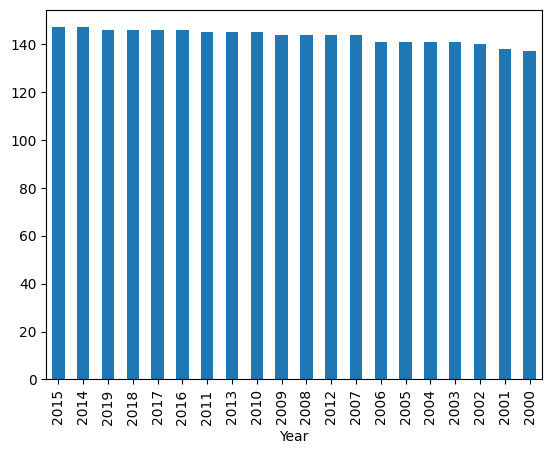

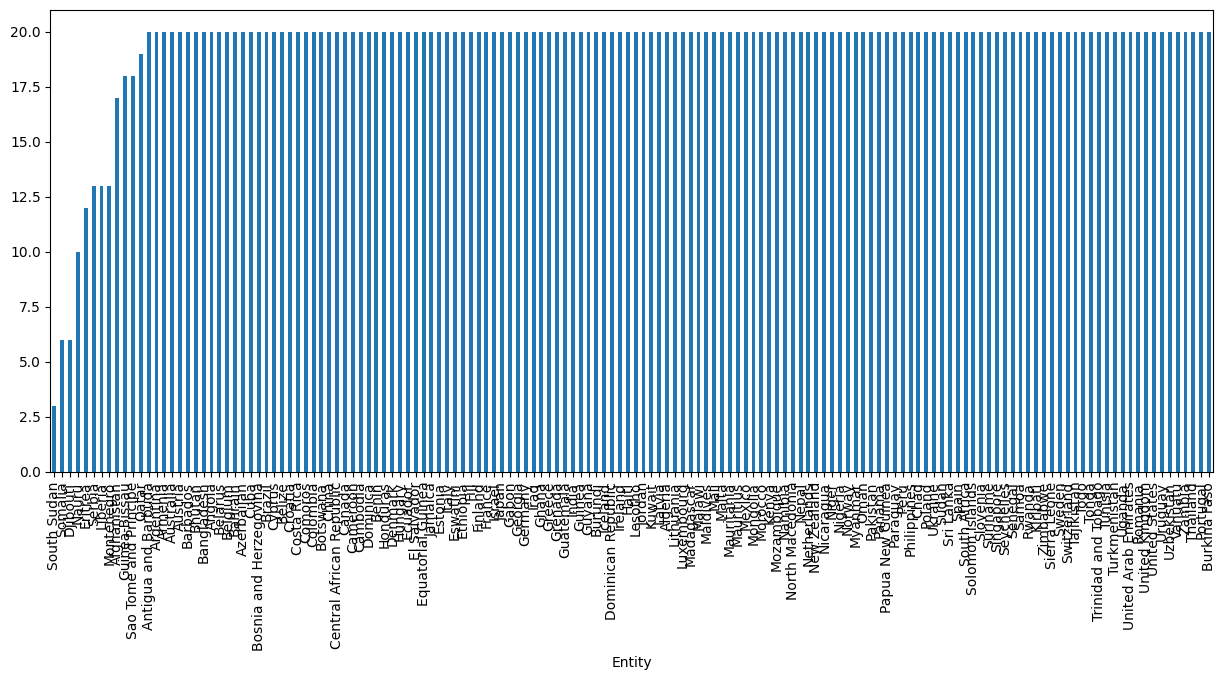

In [72]:
energy['Year'].value_counts().plot.bar()
plt.figure(figsize=(15,6))

energy['Entity'].value_counts().sort_values(ascending=True).plot.bar()
plt.tick_params(axis='x', rotation=90)

**Nous observons des disparités dans le nombre d'observations pour chaque année. Les années les plus anciennes présentent moins d'observations que les plus récentes, ce qui peut indiquer une amélioration dans la collecte des données au fil du temps. De plus, il est important de noter que nous n'avons pas le même nombre d'observations pour chaque pays. Certains pays, comme le South Sudan, ont significativement moins d'observations par rapport aux autres.**

#### <span style="color:blue">*II.2 Variables quantitatives* </span>

In [73]:
energyQuant=energy.iloc[:,2:] #On extrait que les variables quantitatives

Text(0, 0.5, 'Electricity Access (% Population)')

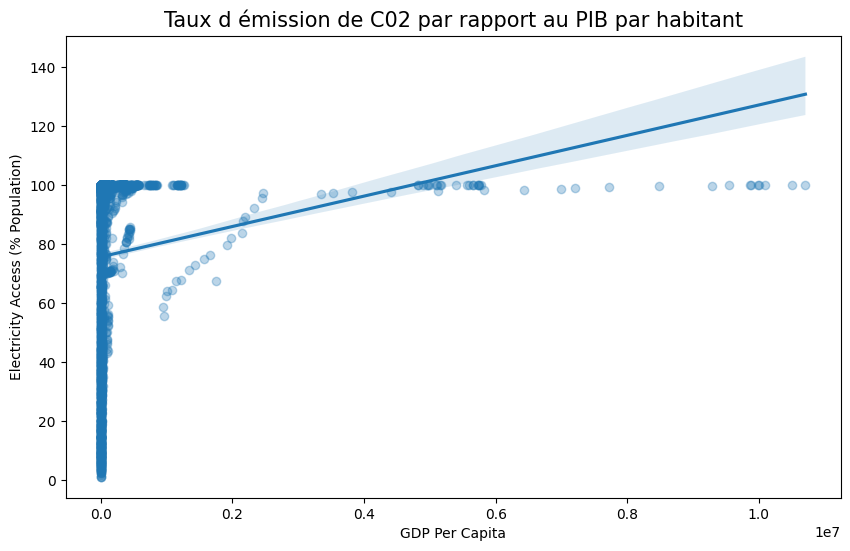

In [74]:
plt.figure(figsize=(10,6))
sns.regplot(x='Value_co2_emissions_kt_by_country', y='Access to electricity (% of population)', data=energy, scatter_kws={'alpha':0.3})
plt.title('Taux d émission de C02 par rapport au PIB par habitant', size=15)
plt.xlabel('GDP Per Capita')
plt.ylabel('Electricity Access (% Population)')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Access to electricity (% of population)'),
  Text(1, 0, 'Access to clean fuels for cooking'),
  Text(2, 0, 'Renewable energy share in the total final energy consumption (%)'),
  Text(3, 0, 'Electricity from nuclear (TWh)'),
  Text(4, 0, 'Electricity from renewables (TWh)'),
  Text(5, 0, 'Low-carbon electricity (% electricity)'),
  Text(6, 0, 'Primary energy consumption per capita (kWh/person)'),
  Text(7, 0, 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'),
  Text(8, 0, 'Value_co2_emissions_kt_by_country'),
  Text(9, 0, 'gdp_growth'),
  Text(10, 0, 'gdp_per_capita'),
  Text(11, 0, 'Density'),
  Text(12, 0, 'Land Area(Km2)'),
  Text(13, 0, 'Latitude'),
  Text(14, 0, 'Longitude')])

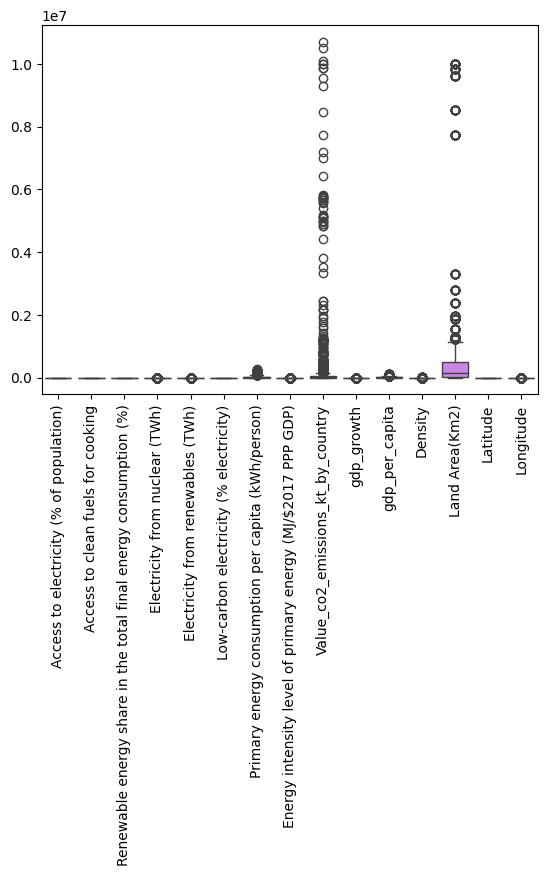

In [75]:
sns.boxplot(energyQuant)
plt.xticks(rotation=90)

**Nous notons que nos variables présentent non seulement des unités de mesure variées, mais aussi des échelles différentes. Certaines variables ont une importance relative plus élevée que d'autres. Afin d'homogénéiser nos données on va les centrer et les reduire.**

**Nous allons maintenant déterminer les variables qui présentent le plus d'outliers**

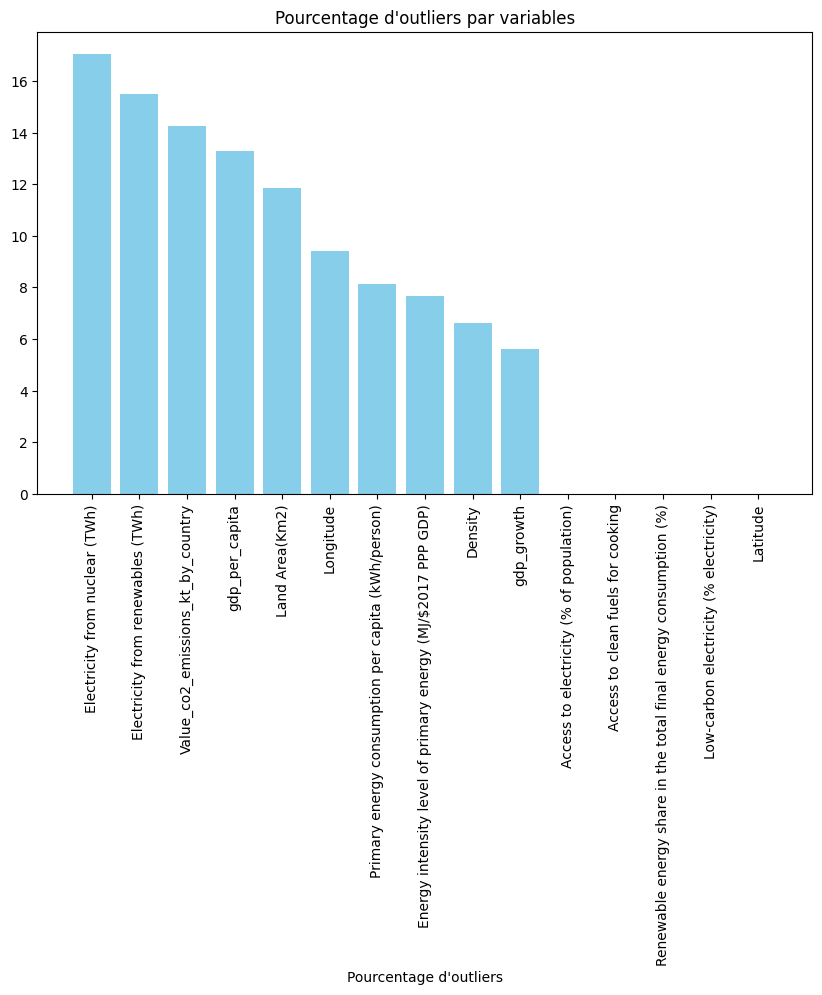

In [76]:

def percent_outliers(data): #renvoie
    percent_outliers_list = []
    for i in range(data.shape[1]): 
            q1 = np.percentile(data.iloc[:, i], 25)
            q3 = np.percentile(data.iloc[:, i], 75)
            iqr = q3 - q1
            bornes_inf = q1 - 1.5 * iqr
            bornes_sup = q3 + 1.5 * iqr
            outliers = data.iloc[:, i][(data.iloc[:, i] < bornes_inf) | (data.iloc[:, i] > bornes_sup)]
            percent_outliers = 100 * len(outliers) / len(data.iloc[:, i])
            percent_outliers_list.append((data.columns[i], percent_outliers))
    return percent_outliers_list

pourcentages_outliers = percent_outliers(energyQuant)

# Tri de la liste par ordre croissant en fonction du pourcentage d'outliers
pourcentages_outliers_tries = sorted(pourcentages_outliers, key=lambda x: x[1],reverse=True)


# Séparation des colonnes et des pourcentages
colonnes = [colonne for colonne, _ in pourcentages_outliers_tries]
pourcentages = [pourcentage for _, pourcentage in pourcentages_outliers_tries]

# Tracé du graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(colonnes, pourcentages, color='skyblue')
plt.xlabel("Pourcentage d'outliers")
plt.title("Pourcentage d'outliers par variables")
plt.xticks(rotation=90)
plt.show()
        
    






**On remarque après analyse beacoup d'outliers au niveau des variables 'Electricity from fossil fuels', 'Electricity from nuclear' et 'Electricity from renewables'. Il contiennent plus 15% de valeurs aberrantes. Il est plausible que dans certains pays par rapport aux autres, ces sources d'énergie soient beaucoup plus abondantes et largement utilisées, ce qui peut entraîner des fluctuations  dans les données.**

**Nous allons maintenant observer la distribution de chaque variable en construisant un histogramme pour chacune d'entre elles.**.

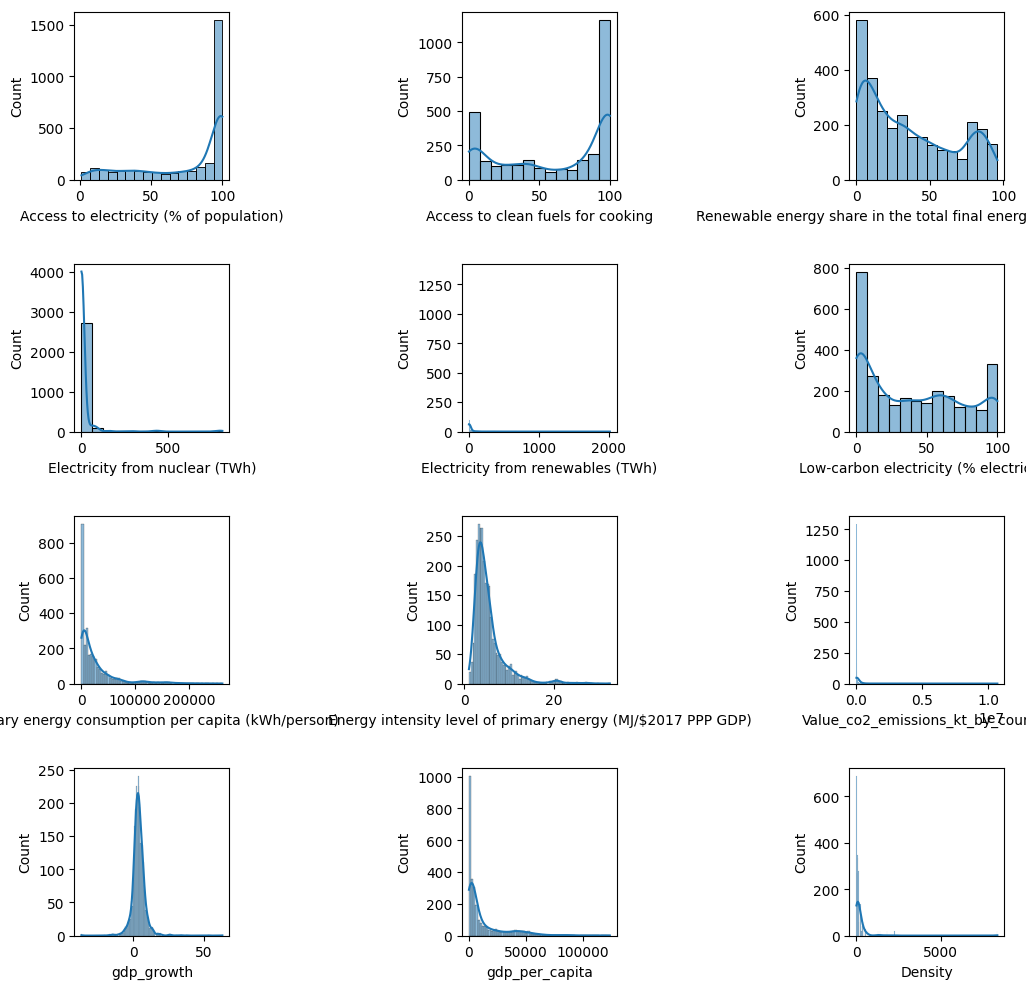

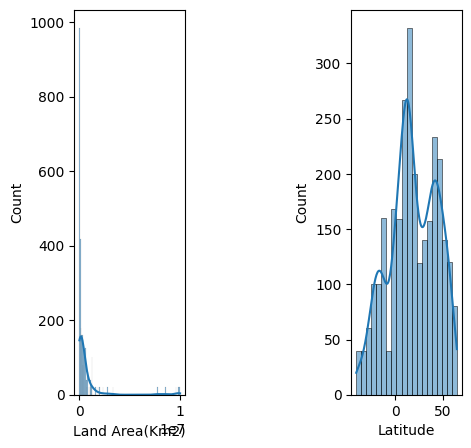

In [77]:
fig,ax=plt.subplots(4,3,figsize=(12, 12))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
k=0
for i in range(4):
    for j in range(3):
        sns.histplot(energyQuant.iloc[:, k], kde=True, ax=ax[i, j])
        k+=1

plt.show()
fig,ax=plt.subplots(1,2,figsize=(5, 5))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
for j in range(2):
    sns.histplot(energyQuant.iloc[:, k], kde=True, ax=ax[j])
    k+=1

**Nous remarquons que de nombreuses variables ne suivent pas une distribution gaussienne. Pour remédier à cela, nous allons appliquer des transformations logarithmiques ou racine carrée.**

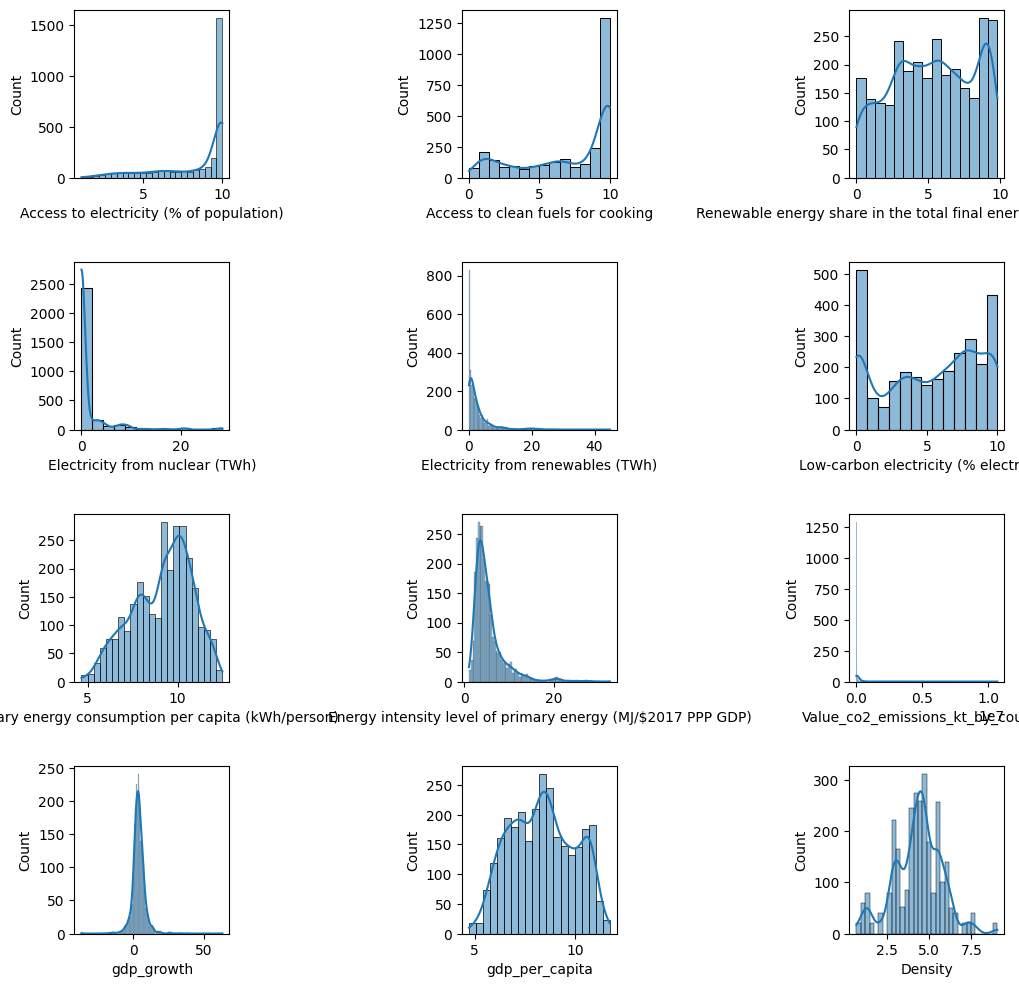

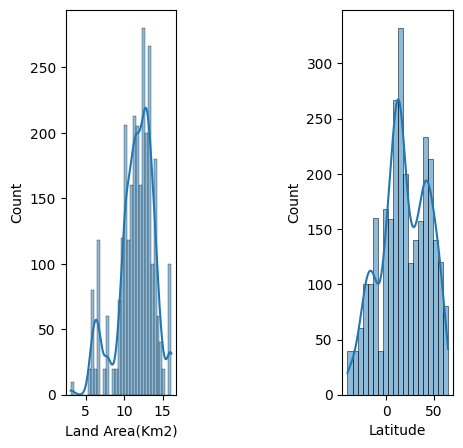

In [78]:
# Prendre la racine carrée des colonnes spécifiques
columns_sqrt = ["Access to electricity (% of population)",
                "Access to clean fuels for cooking",
                "Renewable energy share in the total final energy consumption (%)",
                "Electricity from nuclear (TWh)",
                "Electricity from renewables (TWh)",
                "Low-carbon electricity (% electricity)"]
energy[columns_sqrt] = np.sqrt(energy[columns_sqrt])

# Prendre le logarithme des colonnes spécifiques
columns_log = ["Primary energy consumption per capita (kWh/person)",
               "gdp_per_capita",
               "Density",
               "Land Area(Km2)"]
energy[columns_log] = np.log(energy[columns_log])

energyQuant=energy.iloc[:,2:]

fig,ax=plt.subplots(4,3,figsize=(12, 12))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
k=0
for i in range(4):
    for j in range(3):
        sns.histplot(energyQuant.iloc[:, k], kde=True, ax=ax[i, j])
        k+=1

plt.show()
fig,ax=plt.subplots(1,2,figsize=(5, 5))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
for j in range(2):
    sns.histplot(energyQuant.iloc[:, k], kde=True, ax=ax[j])
    k+=1

### <span style="color:blue">**II. Analyse multidimentionnelle** </span>

#### <span style="color:blue">**II.a Matrice de corrélation** </span>

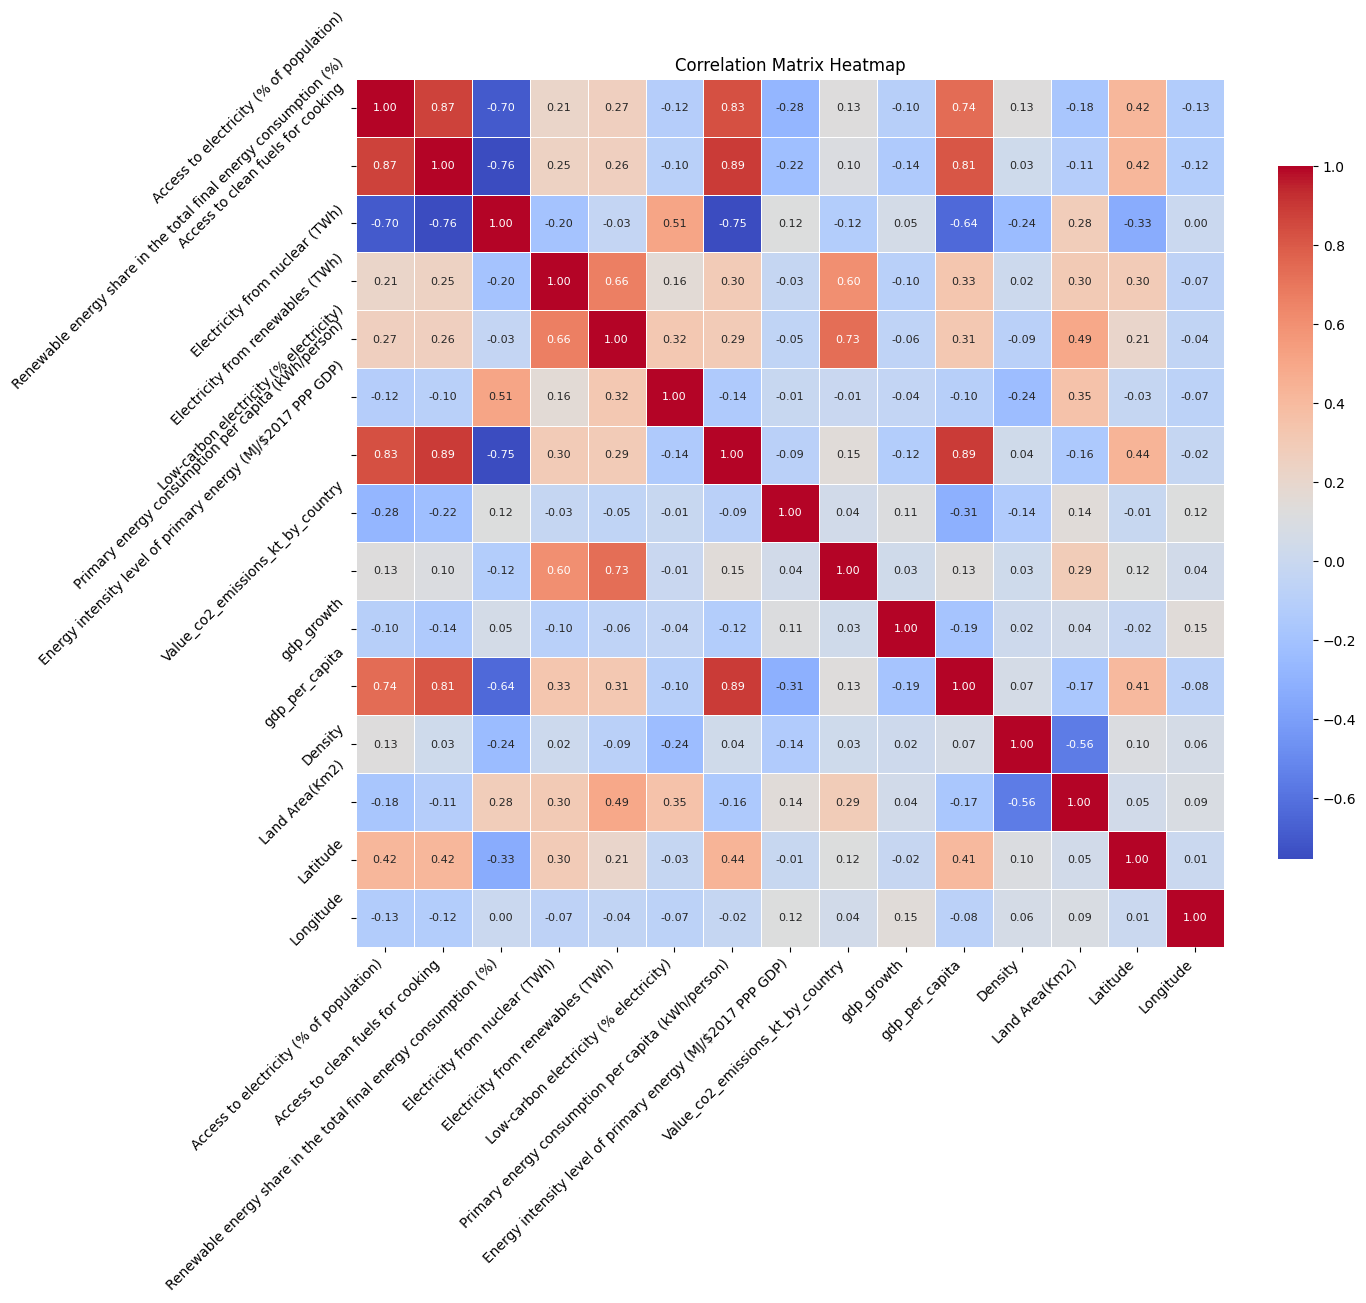

In [79]:
numeric_df = energy.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
# Display the correlation matrix


# Increase the figure size for a clearer heatmap
plt.figure(figsize=(14, 12))
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
            cbar_kws={"shrink": .75}, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
            annot_kws={"size": 8}, square=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.title('Correlation Matrix Heatmap')
plt.show()



**Selon le graphique de corrélation , on observe que la variable à prédire, la quantité d'émissions de CO2 par pays (Value_co2_emissions_kt_by_country), présente une corrélation plus significative avec la production d'électricité à partir de sources renouvelables, et dans une moindre mesure avec la production d'électricité d'origine nucléaire. Cependant, elle affiche une corrélation négative avec la proportion d'énergie renouvelable dans la consommation totale d'électricité.**
**La corrélation observée peut sembler contre-intuitive. Cependant, elle peut être expliquée par le fait que les pays plus riches ont souvent une capacité plus importante à investir dans le nucléaire et les énergies renouvelables. Ainsi, une plus grande production d'électricité à partir de ces sources pourrait être associée à des niveaux d'émissions de CO2 plus élevés, car des niveaux de richesse plus importante.**
**Par ailleurs, la corrélation négative entre les émissions de CO2 et la part d'énergie renouvelable dans la consommation d'électricité souligne l'importance des énergies propres pour réduire ces émissions.**

#### <span style="color:blue">II.b. Analyse en composantes principales</span>

**Nous allons réaliser une Analyse en Composantes Principales (ACP) sur l'ensemble de données, à l'exception de la variable que nous cherchons à prédire. L'objectif de cette analyse est de simplifier la complexité de nos données en réduisant leurs dimensions.**

In [80]:
Value_co2_emissions_kt_by_country=np.log(energy['Value_co2_emissions_kt_by_country'])
data=energy.copy()  #Servira pour la carte du monde plus tard
energy.drop(['Value_co2_emissions_kt_by_country'],axis=1,inplace=True)
energyQuant.drop(['Value_co2_emissions_kt_by_country'],axis=1,inplace=True)
Value_co2_emissions_kt_by_country.reset_index(drop=True,inplace=True)
Value_co2_emissions_kt_by_country.index

RangeIndex(start=0, stop=2868, step=1)

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler=StandardScaler()
scaler.fit(energyQuant)
energyQuant1=scaler.transform(energyQuant)
pca=PCA()
energyQuant1_pca=pca.fit(energyQuant1).transform(energyQuant1)


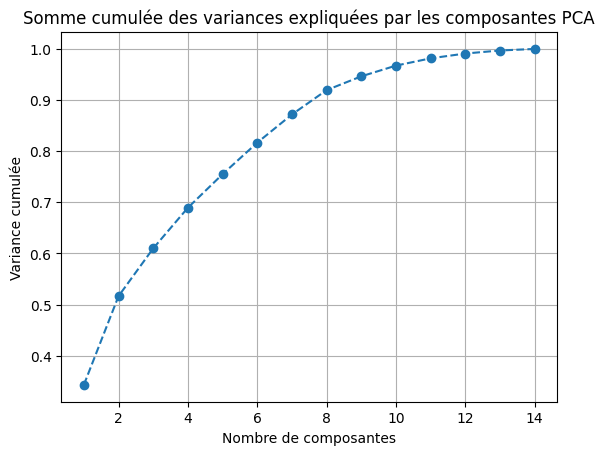

In [82]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Tracer la somme cumulée des variances
plt.plot(range(1,15),cumulative_variance,marker='o',linestyle="--")
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée')
plt.title('Somme cumulée des variances expliquées par les composantes PCA')
plt.grid(True)
plt.show()

**Nous constatons que 6 dimensions suffisent pour expliquer 80% de la variance dans nos données.**.

**On trace le graphe des individus colorié en fonction du taux d'émission de C02 , puis par le continent auquel les individus (pays) appartiennent**

In [83]:
import country_converter as coco
Continents= coco.convert(names=energy['Entity'], to='continent') #Continents est la conversion des pays en continent auquel ils font partie


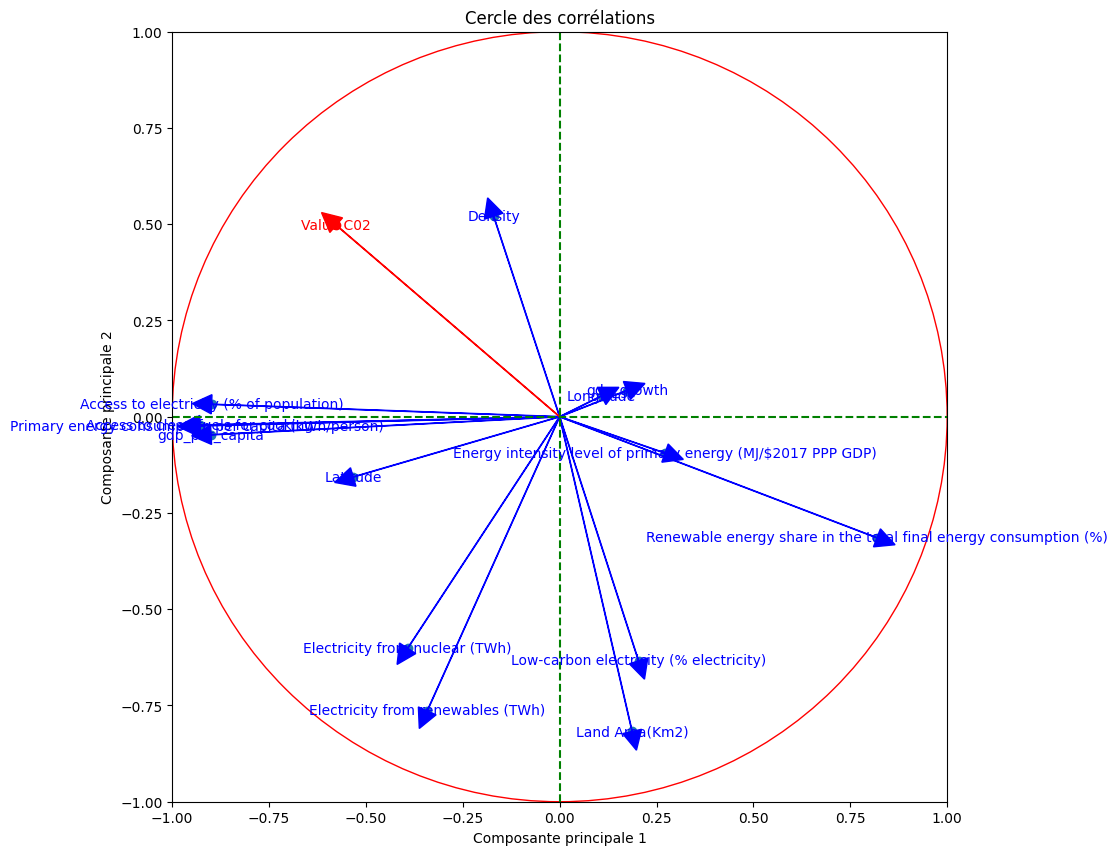

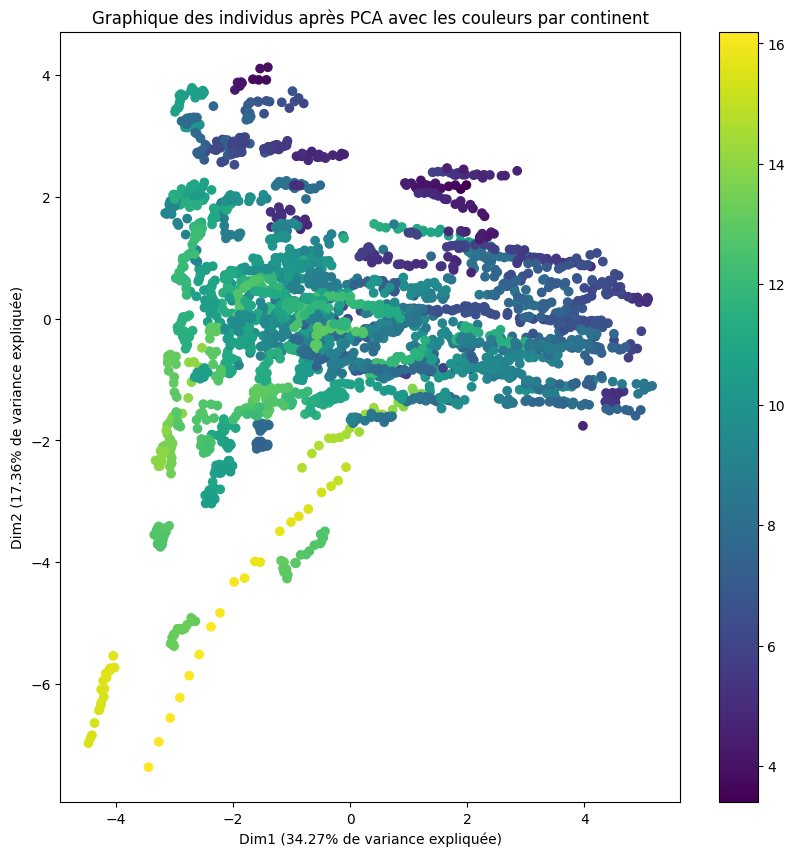

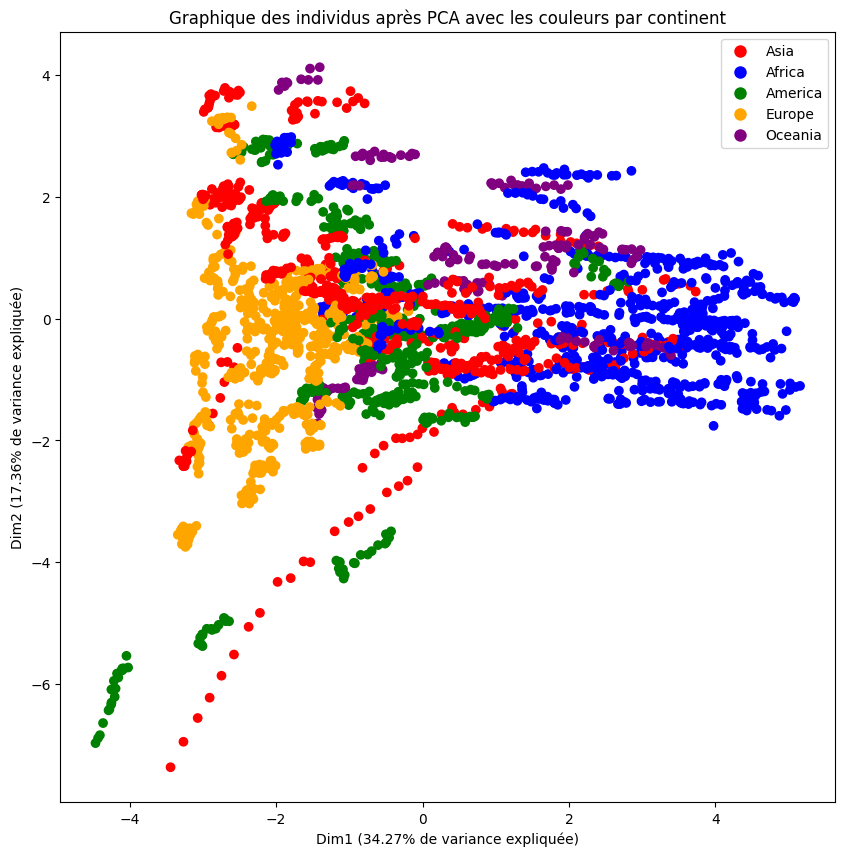

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Coordonnées pour le cercle des corrélations
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = (-1) * pca.components_[1] * np.sqrt(pca.explained_variance_[1])

# Premier graphique : Cercle des corrélations
plt.figure(figsize=(10, 10))
plt.scatter(coord1, coord2)
for i, j, nom in zip(coord1, coord2, energyQuant.columns):
    plt.text(i, j, nom, fontsize=10, ha='center', va='center', color='blue')
    plt.arrow(0, 0, i, j, color='blue', head_width=0.05, head_length=0.05)

# Ajout de la variable à prédire
# Calculer la corrélation entre Value_co2_emissions_kt_by_country et chaque composante principale
coord_pred1 = np.corrcoef(Value_co2_emissions_kt_by_country, energyQuant1_pca[:, 0])[0, 1]
coord_pred2 = np.corrcoef(Value_co2_emissions_kt_by_country, energyQuant1_pca[:, 1])[0, 1]

plt.scatter(coord_pred1, coord_pred2, color='red')
plt.text(coord_pred1, coord_pred2, 'Value C02', fontsize=10, ha='center', va='center', color='red')
plt.arrow(0, 0, coord_pred1, coord_pred2, color='red', head_width=0.05, head_length=0.05)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, linestyle='dashed', color='green')
plt.axvline(0, linestyle='dashed', color='green')
cercle = plt.Circle((0, 0), radius=1, color='red', fill=False)
plt.gca().add_patch(cercle)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Cercle des corrélations')
plt.show()

# Deuxième graphique : Graphique des individus après PCA
plt.figure(figsize=(10, 10))
sc = plt.scatter(energyQuant1_pca[:, 0], (-1) * energyQuant1_pca[:, 1], c=Value_co2_emissions_kt_by_country)
plt.xlabel(f'Dim1 ({pca.explained_variance_ratio_[0] * 100:.2f}% de variance expliquée)')
plt.ylabel(f'Dim2 ({pca.explained_variance_ratio_[1] * 100:.2f}% de variance expliquée)')
plt.title('Graphique des individus après PCA avec les couleurs par continent')
plt.colorbar(sc)
plt.show()

# Troisième graphique : Graphique des individus après PCA avec les couleurs par continent
continent_colors = {'Asia': 'red', 'Africa': 'blue', 'America': 'green', 'Europe': 'orange', 'Oceania': 'purple'}
colors = [continent_colors[continent] for continent in Continents]
plt.figure(figsize=(10, 10))
plt.scatter(energyQuant1_pca[:, 0], (-1) * energyQuant1_pca[:, 1], c=colors, label='Continents')
plt.xlabel(f'Dim1 ({pca.explained_variance_ratio_[0] * 100:.2f}% de variance expliquée)')
plt.ylabel(f'Dim2 ({pca.explained_variance_ratio_[1] * 100:.2f}% de variance expliquée)')
plt.title('Graphique des individus après PCA avec les couleurs par continent')

# Légende personnalisée pour les continents
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=continent, 
                             markerfacecolor=color, markersize=10) 
                  for continent, color in continent_colors.items()]
plt.legend(handles=legend_handles)

plt.show()



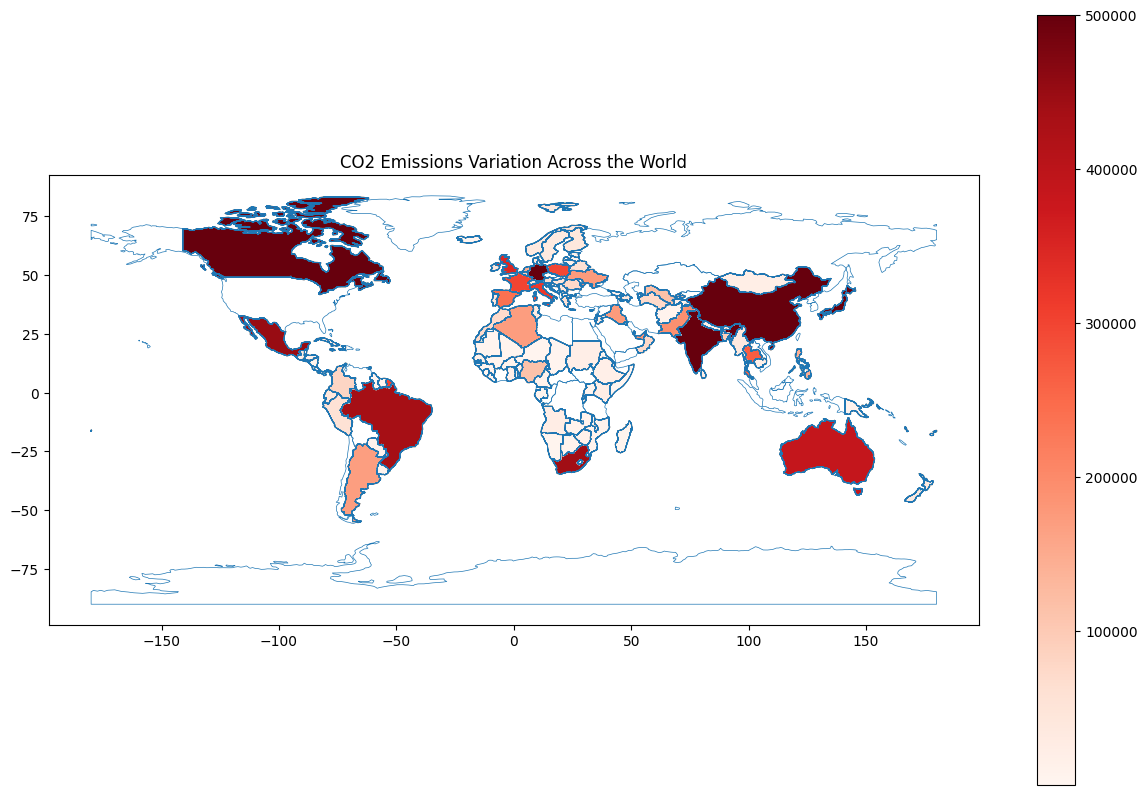

In [87]:


import geopandas as gpd

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world data with CO2 emissions data
world = world.merge(data[['Entity', 'Value_co2_emissions_kt_by_country']], how='left', left_on='name', right_on='Entity')

# Plot the world map
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=0.5)
world.plot(column='Value_co2_emissions_kt_by_country', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=100, vmax=500000) # Adjust the vmin and vmax values as needed
plt.title('CO2 Emissions Variation Across the World')
plt.show()



**Il est remarquable que les pays les plus pollueurs sont fortement corrélés avec la dimension 2, et également fortement corrélés négativement avec la dimension 1. Les émissions de CO2 sont ainsi négativement corrélées avec la dimension 1 et positivement avec la dimension 2.**

**Dans le graphique des individus, la plupart des pays européens se trouvent principalement du côté négatif de la dimension 1, tandis que les pays africains sont positivement corrélés. Quant aux pays asiatiques et américains, bien que des pays comme les États-Unis, la Chine et le Japon se positionnent aux extrémités négatives en raison de leurs fortes émissions de CO2, la plupart des autres pays de ces continents se situent du côté positif. Cette observation corrobore l'idée que la pollution est liée à la richesse, comme suggéré par la matrice de corrélation. Le PIB par habitant est d'ailleurs fortement corrélé négativement à la dimension. Ainsi il y'a un lien significatif entre la dimension 1 et la richess des pays.**

**Quant à la dimension 2, elle est négativement corrélée avec la taille du pays (Land Area), la quantité d'électricité renouvelable, nucléaire et bas carbone. Le graphique des individus révèle également une corrélation positive entre la quantité de CO2 émise et la dimension 2, suggérant ainsi que cette dimension pourrait être associée à l'accès à l'électricité.**

### <span style="color:blue">**III. Modélisations** </span>

In [88]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score


In [89]:
energy.reset_index(drop=True,inplace=True)
energyQuant.reset_index(drop=True,inplace=True)

**Les variables Entiy et Year possédant trop de modalités on va passer à un modèle simplifié ou les pays sont regroupés par continent et les années par période quadriennale pour faciliter la modélisation linéaire et son interprètation.**

In [90]:
energy2=energy.copy()
energy2['Year']=energy2['Year'].astype(int)

bins = [2000, 2004, 2008, 2012, 2016, 2020]

# Étiquettes pour les intervalles
labels = ['2000-2004', '2004-2008', '2008-2012', '2012-2016', '2016-2020']

# Ajouter la nouvelle variable qualitative au DataFrame
energy2['Periode'] = pd.cut(energy2['Year'], bins=bins, labels=labels, right=False)

# Afficher les premières lignes pour vérifier
energy2.drop(columns=['Year'],inplace=True)

energy2['Continent']= coco.convert(names=energy2['Entity'], to='continent')
energy2.drop(columns=['Entity'],inplace=True)

energy2.head()




,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude,Periode,Continent
0,3.839076,3.082207,6.054750,0.0,0.793725,8.186653,5.437941,1.40,8.832278,5.250617,4.094345,13.388153,33.93911,67.709953,2000-2004,Asia
1,4.479394,3.301515,6.651316,0.0,0.748331,7.932298,5.319253,1.20,1.414118,5.353667,4.094345,13.388153,33.93911,67.709953,2004-2008,Asia
2,5.038938,3.492850,5.820653,0.0,0.768115,7.964977,5.529703,1.41,11.229715,5.489067,4.094345,13.388153,33.93911,67.709953,2004-2008,Asia
3,5.542444,3.721559,5.647123,0.0,0.800000,8.728716,5.718411,1.50,5.357403,5.574940,4.094345,13.388153,33.93911,67.709953,2004-2008,Asia
4,6.004249,3.911521,5.364699,0.0,0.866025,8.885233,5.870087,1.53,13.826320,5.885251,4.094345,13.388153,33.93911,67.709953,2004-2008,Asia


In [91]:
dataDum=pd.get_dummies(energy2[['Periode','Continent']]) #Transformation des variables qualitatives en indicatrice

energy2= pd.concat([dataDum, energyQuant], axis=1) 
energy2.head()

,Periode_2000-2004,Periode_2004-2008,Periode_2008-2012,Periode_2012-2016,Periode_2016-2020,Continent_Africa,Continent_America,Continent_Asia,Continent_Europe,Continent_Oceania,...,Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,True,False,False,False,False,False,False,True,False,False,...,0.793725,8.186653,5.437941,1.40,8.832278,5.250617,4.094345,13.388153,33.93911,67.709953
1,False,True,False,False,False,False,False,True,False,False,...,0.748331,7.932298,5.319253,1.20,1.414118,5.353667,4.094345,13.388153,33.93911,67.709953
2,False,True,False,False,False,False,False,True,False,False,...,0.768115,7.964977,5.529703,1.41,11.229715,5.489067,4.094345,13.388153,33.93911,67.709953
3,False,True,False,False,False,False,False,True,False,False,...,0.800000,8.728716,5.718411,1.50,5.357403,5.574940,4.094345,13.388153,33.93911,67.709953
4,False,True,False,False,False,False,False,True,False,False,...,0.866025,8.885233,5.870087,1.53,13.826320,5.885251,4.094345,13.388153,33.93911,67.709953


**Nous allons diviser le jeu de données en deux ensembles distincts : un ensemble d'apprentissage et un ensemble de test.**

In [92]:

scaler = StandardScaler()  



XTrain, XTest, YTrain, YTest = train_test_split(energy2, Value_co2_emissions_kt_by_country, test_size=0.2, random_state=111)
scaler.fit(XTrain)
Xr_train = scaler.transform(XTrain)

Xr_test = scaler.transform(XTest)

#### <span style="color:blue">**III.A Regression linéaire** </span>

#### <span style="color:blue">**III.A Régression linéaire sans sélection de variables** </span>

**La régression linéaire va modéliser la relation entre l'émission de CO2 $ Y $ (la variable à prédire) et les autres variables du jeu de données $ X_1, X_2, ..., X_n $ (les variables explicatives). Elle cherche à établir une relation linéaire entre les variables en ajustant les coefficients $ \beta_0, \beta_1, \beta_2, ..., \beta_n $ de manière à minimiser la somme des carrés des écarts entre les valeurs prédites par le modèle et les valeurs réelles observées.**

**La formule de la régression linéaire est la suivante :**

\
**$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \varepsilon$**
\

Où :
**- $ Y $ est la variable à prédire,**

**- $ X_1, X_2, ..., X_n $ les variables explicatives,**

**- $ \beta_0 $ est l'ordonnée à l'origine (le biais),**

**- $ \beta_1, \beta_2, ..., \beta_n $ sont les coefficients des variables explicatives,**

**- $ \varepsilon $ est l'erreur résiduelle qui représente la différence entre les valeurs prédites et les valeurs réelles.**


In [93]:
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import pylab 
import statsmodels.api as sm


# Extraction des noms des colonnes de energy2
column_names = energy2.columns

Mse_M = {}
Time_M = {}

# Ajuster le modèle de régression linéaire
start_time = time.time()
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)
end_time = time.time()

# Faire des prédictions sur l'ensemble de test
y_chap_RL = regLin.predict(Xr_test)

# Calculer l'erreur quadratique moyenne (MSE)
RL_mse = mean_squared_error(YTest, y_chap_RL)

# Calculer le R-carré ajusté
n = Xr_test.shape[0]  # nombre d'observations
k = Xr_test.shape[1]  # nombre de variables
RL_R2 = r2_score(YTest, y_chap_RL)
RL_R2ajus = 1 - (1 - RL_R2) * (n - 1) / (n - k - 1)

# Enregistrer le temps écoulé
Time = end_time - start_time
print("MSE =", RL_mse)
print("R-carré ajusté =", RL_R2ajus)
Mse_M["RegLin"] = RL_mse
Time_M["RegLin"] = Time





MSE = 0.09118959101995831
R-carré ajusté = 0.9827104717876041


<Figure size 640x480 with 0 Axes>

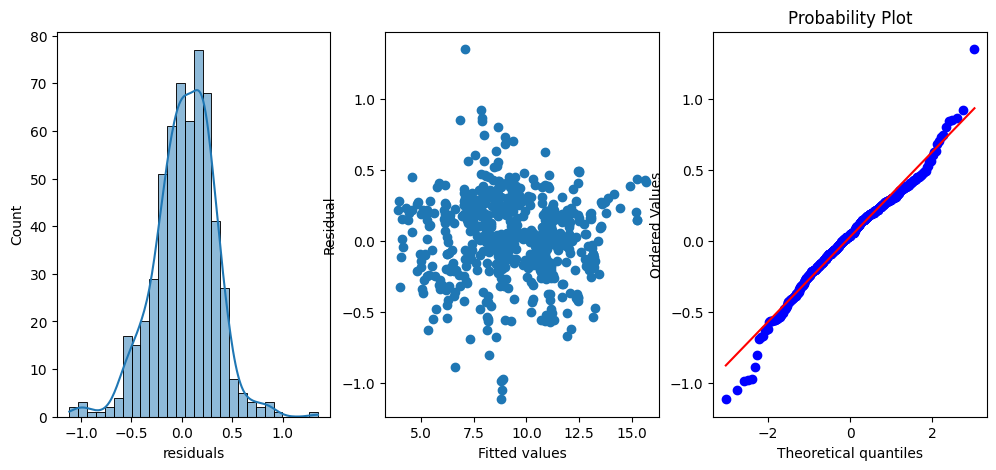

In [94]:
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
sns.histplot(YTest-y_chap_RL,kde=True)
plt.ylabel('Count')
plt.xlabel('residuals')

plt.subplot(1,3,2)
plt.scatter(y_chap_RL,YTest-y_chap_RL)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.subplot(1,3,3)
stats.probplot(YTest-y_chap_RL, dist="norm", plot=pylab)
pylab.show()
plt.show()

**Conclusion**

**La régression linéaire présente une MSE de 0,0912 et un $R^2_{ajusté}$ de 0,9827 sur l'échantillon de test, suggérant que les prédictions du modèle sont très proches des valeurs observées et que peu de variance est laissée inexpliquée.**

**En examinant le graphique des valeurs prédites versus les valeurs réelles, nous constatons que les points se rapprochent de la ligne d'identité, ce qui démontre encore une fois la précision du modèle.**

**De plus, les résidus semblent suivre une distribution gaussienne, comme le montrent le Q-Q plot et l'histogramme des résidus. Cette normalité des résidus indique que les hypothèses de la régression linéaire sont respectées, renforçant la robustesse et la fiabilité du modèle.**

**Enfin, les p-valeurs des paramètres suggèrent que la longitude, la latitude et le PIB par habitant pourraient être éliminés du modèle, car ils ne contribuent pas de manière significative à la prédiction.**

#### <span style="color:blue">**III.A.3 Regression linéaire Lasso** </span>

**La régression linéaire avec la méthode du Lasso est une variation de la régression linéaire qui introduit une pénalité L1 sur les coefficients $\beta$. Cette pénalité permet de réduire certains coefficients à zéro, ce qui peut conduire à une sélection automatique des variables explicatives et à une forme de régularisation du modèle.**

**La formule de la régression linéaire avec la méthode du Lasso est la suivante :**

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \varepsilon$$

**avec la contrainte additionnelle que la somme des valeurs absolues des coefficients des variables explicatives, pondérée par un paramètre de pénalisation $\lambda$, soit inférieure à un seuil :**

$$\sum_{i=1}^{n} |\beta_i| \leq s$$

**où $s$ est le seuil déterminé par le paramètre de pénalisation $\lambda$.**

**La fonction objectif à minimiser pour trouver les coefficients $\beta$ avec la méthode du Lasso est la suivante :**

$$\text{min} \left( \sum_{i=1}^{m} (Y_i - (\beta_0 + \sum_{j=1}^{n} \beta_j X_{ij}))^2 + \lambda \sum_{j=1}^{n} |\beta_j| \right)$$

**où $\lambda$ contrôle la force de la pénalité L1. Plus $\lambda$ est grand, plus la pénalisation est forte et plus de coefficients seront réduits à zéro. En revanche, si $\lambda$ est proche de zéro, la méthode du Lasso se rapproche de la régression linéaire classique.**

**En résumé, la méthode du Lasso est utile pour sélectionner les variables importantes et pour régulariser le modèle, ce qui peut améliorer sa capacité de généralisation aux données non vues.**


In [95]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Ajustement du modèle de régression Lasso
regLasso = Lasso()
regLasso.fit(Xr_train, YTrain)

# Prédiction sur l'ensemble de test
y_chap_lasso = regLasso.predict(Xr_test)

# Calcul de l'erreur quadratique moyenne
lasso_mse = mean_squared_error(YTest, y_chap_lasso)

# Calcul du R2 ajusté
n = len(YTest)
p = Xr_test.shape[1] # Nombre de prédicteurs
lasso_r2 = r2_score(YTest, y_chap_lasso)
lasso_r2_ajusté = 1 - (1 - lasso_r2) * ((n - 1) / (n - p - 1))

# Affichage du coefficient lambda choisi
lasso_lambda = regLasso.alpha
print("Coefficient lambda choisi par le modèle Lasso:", lasso_lambda)

print("MSE =", lasso_mse)
print("R2 ajusté =", lasso_r2_ajusté)
print("Time =", Time)


Coefficient lambda choisi par le modèle Lasso: 1.0
MSE = 3.6871918320048582
R2 ajusté = 0.30090916637611254
Time = 0.005994081497192383


In [96]:
coef = pd.Series(regLasso.coef_, index = XTrain.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

variables_supprimees_nom = coef[coef != 0].index.tolist()
print("Variables conservé par Lasso : ", variables_supprimees_nom)


Lasso conserve 4 variables et en supprime 20
Variables conservé par Lasso :  ['Access to clean fuels for cooking', 'Electricity from renewables (TWh)', 'Primary energy consumption per capita (kWh/person)', 'Land Area(Km2)']


**La méthode lasso qui utilise les valeurs par défaut est moins précise que la régression linéaire malgrè un temps d'éxécution relativement similaire.Cependant on peut dégager en constatant les variables qu'elle conserve les variables les plus influentes de notre régression linéaire**



Text(0, 0.5, 'Residuals')

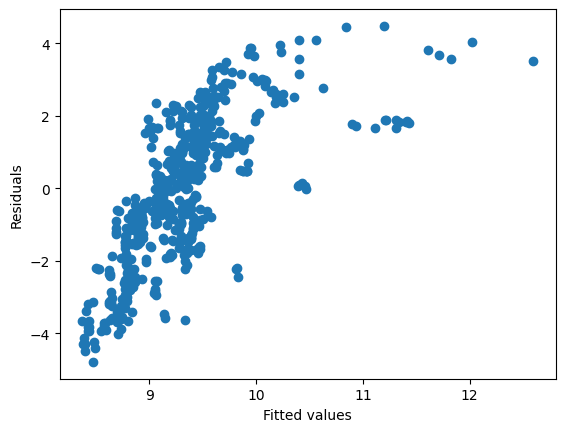

In [97]:
plt.scatter(y_chap_lasso,YTest-y_chap_lasso)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

**Maintenant, nous allons déterminer le $\lambda_{optimal}$ en utilisant la Validation Croisée.**

**La méthode de la recherche en grille avec [validation croisée](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) $(\textit{Grid Search Cross Validation})$ est une technique d'optimisation utilisée pour trouver les meilleurs hyperparamètres pour un modèle d'apprentissage automatique. Cette méthode consiste à spécifier une grille de valeurs pour les hyperparamètres à optimiser, puis à évaluer le modèle pour chaque combinaison d'hyperparamètres à l'aide de la validation croisée.**

**La grille des hyperparamètres est généralement définie à l'avance avec une liste de valeurs pour chaque hyperparamètre à ajuster. Ensuite, la validation croisée est utilisée pour évaluer les performances du modèle pour chaque combinaison d'hyperparamètres sur plusieurs partitions des données d'entrée**

In [98]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser

param=[{"alpha":[0,0.05,0.1,0.2,0.3,1,1.5]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, YTrain)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))
warnings.filterwarnings('ignore')

Meilleur R2 = 0.980387, Meilleur paramètre = {'alpha': 0}


**Le paramètre lambda sélectionné est de 0. L'absence de régularisation ($\lambda = 0$) implique que la méthode Lasso ne pénalise pas les coefficients et fonctionne essentiellement comme une régression linéaire classique. Étant donné que la régression linéaire sans sélection de variables est déjà assez précise sur ces données, le Lasso ne sélectionne aucune variable supplémentaire. Ainsi, le modèle Lasso réduit simplement à une régression linéaire ordinaire dans ce cas.**


### <span style="color:blue"> **III.B SVM**  </span>

**La régression avec les machines à vecteurs de support [(SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) est une technique d'apprentissage supervisé utilisée pour la prédiction de valeurs continues.**

**Dans le cas de la régression, supposons que nous ayons un ensemble de données d'entraînement $\{(x_1, y_1), (x_2, y_2), ..., (x_m, y_m)\}$ où $x_i$ représente les caractéristiques d'un exemple et $y_i$ est la valeur cible correspondante.**

**L'objectif de la régression SVM est de trouver la fonction de régression qui s'ajuste aux données tout en maximisant la marge autour de l'hyperplan. Contrairement à la classification, où l'hyperplan vise à séparer les classes, en régression, l'hyperplan essaie de minimiser l'erreur de prédiction tout en maintenant une marge tolérable.**

**Mathématiquement, la fonction de régression avec SVM peut être définie comme suit :**

$$ f(x) = \sum_{i=1}^{m} (\alpha_i - \alpha_i^*) K(x, x_i) + b $$

**où $\alpha_i$ et $\alpha_i^*$ sont les multiplicateurs de Lagrange, $K(x, x_i)$ est la fonction noyau qui mesure la similarité entre les exemples $x$ et $x_i$, et $b$ est le biais.**

**Dans le cas de la régression avec SVM, les paramètres du modèle sont optimisés pour minimiser la perte de régression tout en maintenant la marge maximale. Cela permet de construire un modèle robuste qui peut généraliser efficacement sur de nouvelles données.**



In [99]:
from sklearn.svm import SVR
XTr_svm, XT_svm, YTr_svm, YT_svm = train_test_split(energyQuant, Value_co2_emissions_kt_by_country, test_size=0.2, random_state=11)
scaler.fit(XTr_svm)
Xr_train_svm = scaler.transform(XTr_svm)

Xr_test_svm = scaler.transform(XT_svm)

from sklearn.svm import SVR

<font color='red' size=4>Warning:</font> <font color='red' size=4>Ce code prend du temps. Prenez directement les résultats.Ils sont été préremplis dans la cellule suivante</font>


In [166]:
# Définition de la grille de paramètres étendue
from sklearn.model_selection import KFold

param_grid = {
    'epsilon': [0.01, 0.1, 1],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Utilisation de neg_mean_squared_error pour le scoring
cv = KFold(n_splits=10, shuffle=True, random_state=11)
svm = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Affichage des meilleurs paramètres et du score de validation croisée
print("Meilleur score (MSE) = %f, Meilleurs paramètres = %s" % (-svmOpt.best_score_, svmOpt.best_params_))



Meilleur score (MSE) = 0.027370, Meilleurs paramètres = {'C': 10, 'epsilon': 0.01, 'gamma': 0.1}


In [ ]:
# Définition de la grille de paramètres pour le modèle SVR avec kernel 'poly'
param_grid = {
    'coef0': [2, 3, 4,],
    'degree': [2, 3, 4],
    'C': [0.4, 0.6]
}

# Utilisation de GridSearchCV pour trouver les meilleurs hyperparamètres
svm = GridSearchCV(SVR(epsilon=0.1, gamma='auto', kernel='poly'), param_grid=param_grid,scoring='neg_mean_squared_error' ,cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Affichage des meilleurs paramètres et du score de validation croisée
print("Meilleur score = %f, Meilleurs paramètres = %s" % (- svmOpt.best_score_, svmOpt.best_params_))


In [ ]:
Ajouté(e)  """

param_grid = {
    'coef0': [2, 3, 4, 5, 6, 7, 12, 15],
    'degree': [2, 3, 4, 5, 6],
    'C': [0.4, 0.5, 0.6, 0.8, 1, 1.4, 10, 15]
}

svm = GridSearchCV(SVR(epsilon=0.1, gamma='auto',kernel='linear'), param_grid=param_grid, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Affichage des meilleurs paramètres et score
print("Meilleur score = %f, Meilleurs paramètres = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))"""

In [44]:
svm=SVR(kernel='rbf',gamma=0.6,  C=10, epsilon=0.01)

### Explication des paramètres de SVR

Le modèle `SVR` (Support Vector Regression) utilise plusieurs paramètres pour contrôler son comportement et son efficacité. Voici une explication de chaque paramètre spécifié dans `SVR(kernel='rbf', degree=1, gamma=0.06, coef0=0, C=45, epsilon=0.01)` :

- **`kernel='poly'`** :
  - Spécifie le type de noyau à utiliser. Le noyau polynomial est choisi.
- **`degree=4`** :
  - Spécifie le degré du noyau polynomial. Ignoré lorsque le noyeau est radial.

- **`gamma=0.06`** :
  - Contrôle l'influence d'un seul exemple d'entraînement. Une valeur faible de `gamma` signifie une large portée, tandis qu'une valeur élevée signifie une portée plus étroite. Pour le noyau RBF, une valeur appropriée de `gamma` est cruciale pour éviter le surapprentissage ou le sous-apprentissage.

- **`coef0=0.4`** :
  - Utilisé uniquement avec les noyaux polynomial et sigmoïdal, il représente le terme indépendant dans la fonction de noyau. Ignoré ici car le noyau est `rbf`.

- **`C=0.4`** :
  - Paramètre de régularisation qui contrôle le compromis entre une marge de décision large et le bon classement des exemples d'entraînement. Une valeur plus élevée de `C` indique une pénalité plus élevée pour les erreurs, potentiellement au risque de surapprentissage. Une valeur plus faible de `C` permet plus d'erreurs dans l'entraînement mais peut aider à éviter le surapprentissage.

- **`epsilon=0.01`** :
  - Définit une zone autour de la fonction cible dans laquelle les erreurs sont ignorées. Un petit `epsilon` signifie que le modèle doit être très précis, tandis qu'un grand `epsilon` tolère plus d'erreurs, simplifiant le modèle.


Time 0.6894664764404297
MSE= 0.02365393938382438


<Figure size 640x480 with 0 Axes>

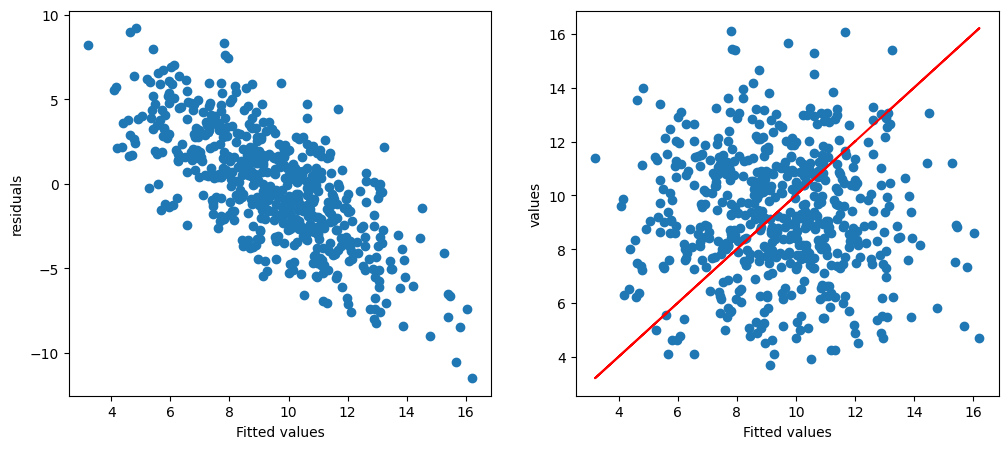

In [100]:
start=time.time()
svmOpt=svm.fit(Xr_train_svm, YTr_svm)
y_chap_svm = svmOpt.predict(Xr_test_svm)
svm_mse=mean_squared_error(y_chap_svm,YT_svm)
end=time.time()
Time=end-start
Mse_M["SVM"]=svm_mse
Time_M["SVM"]=Time
print("Time",Time)
print("MSE=",svm_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_svm,YTest-y_chap_svm)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_svm,YTest)
plt.plot(y_chap_svm,y_chap_svm,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

### <span style="color:blue"> **III.C Cart**  </span>

**La régression avec les arbres de classification et de régression (CART) est une méthode d'apprentissage supervisé utilisée pour la prédiction de valeurs continues..**

**Dans le cas de la régression, nous avons un ensemble de données d'entraînement $\{(x_1, y_1), (x_2, y_2), ..., (x_m, y_m)\}$ où $x_i$ représente les caractéristiques d'un exemple et $y_i$ est la valeur cible correspondante.**

**L'objectif de la régression CART est de construire un arbre de décision qui partitionne l'espace des caractéristiques de manière à minimiser l'erreur de prédiction des valeurs cibles. Chaque nœud de l'arbre divise l'espace en sous-espaces plus petits en fonction d'une règle de partitionnement, généralement basée sur une mesure de pureté comme l'indice de Gini ou l'erreur quadratique moyenne.**

**Mathématiquement, un arbre de régression CART peut être défini par une série de règles de décision basées sur les caractéristiques des données. L'arbre est construit de manière récursive en choisissant à chaque étape la variable de caractéristique et la valeur de seuil qui minimise l'erreur de prédiction.**

**En résumé, la régression avec CART est une méthode flexible et interprétable pour modéliser des relations complexes entre les variables d'entrée et les valeurs de sortie. Elle est particulièrement adaptée aux ensembles de données de grande dimension et peut être efficace même en présence de non-linéarités et d'interactions entre les caractéristiques.**


In [101]:
from sklearn.tree import DecisionTreeRegressor


# Définition de la grille de paramètres pour le modèle DecisionTreeRegressor
param_grid = {
    'max_depth': list(range(2, 30))
}

# Utilisation de GridSearchCV pour trouver les meilleurs hyperparamètres
tree = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
treeOpt = tree.fit(Xr_train, YTrain)

# Affichage des meilleurs paramètres et du score de validation croisée
print("Meilleur score (MSE) = %f, Meilleur paramètre = %s" % (-treeOpt.best_score_, treeOpt.best_params_))



Meilleur score (MSE) = 0.075645, Meilleur paramètre = {'max_depth': 20}


PARAMÉTRE OPTIMISÉ:

$\textbf{max\_depth}$:
**La profondeur maximale de l'arbre de décision. Cela contrôle la complexité de l'arbre en déterminant le nombre maximum de niveaux que l'arbre peut avoir. Une profondeur plus élevée peut conduire à un surapprentissage, tandis qu'une profondeur plus faible peut entraîner un sous-apprentissage.**

In [102]:
DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=25)
treeOpt=tree.fit(Xr_train, YTrain)


In [103]:
treeOpt.score(Xr_test,YTest)

-0.07851450583275664

Time=  0.002299785614013672
MSE= 0.07851450583275664


<Figure size 640x480 with 0 Axes>

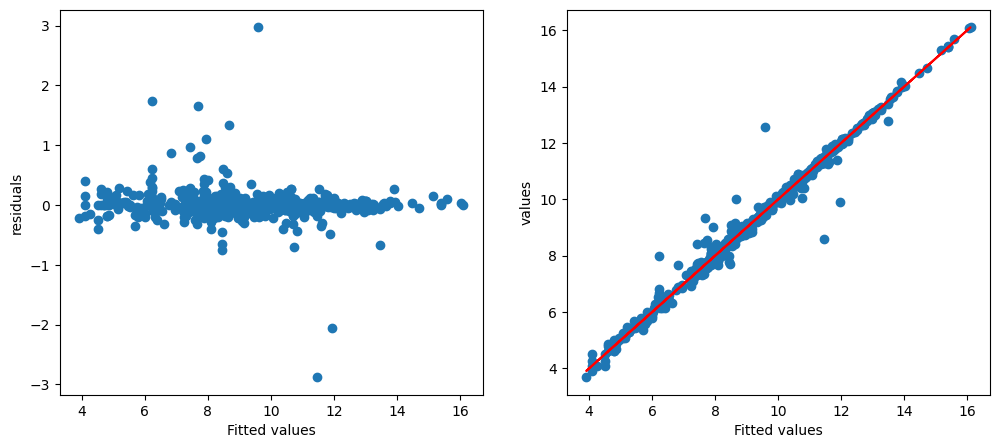

In [104]:
Start=time.time()
y_chap_cart = treeOpt.predict(Xr_test)
cart_mse=mean_squared_error(y_chap_cart,YTest)
end=time.time()
Time=end-Start
Mse_M["Cart"]=cart_mse
Time_M["Cart"]=Time
print("Time= ",Time)
print("MSE=",cart_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_cart,YTest-y_chap_cart)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_cart,YTest)
plt.plot(y_chap_cart,y_chap_cart,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

**Pour l'algorithme CART, le temps d'exécution est de 0,003 secondes, ce qui est très rapide, et la MSE obtenue est de 0,0685. Cette valeur de MSE est légèrement inférieure à celle obtenue avec la régression linéaire, ce qui suggère une performance légèrement supérieure de l'algorithme CART dans ce cas particulier.**

**En examinant le graphique des valeurs prédites par rapport aux valeurs réelles, nous observons une concordance étroite entre les deux, avec les points alignés relativement près de la ligne d'identité. Cela indique que les prédictions de l'algorithme CART sont globalement précises et bien ajustées aux données observées.**

### <span style="color:blue"> **III.D Random forest**  </span>

**Random Forest est une méthode d'apprentissage automatique ensembliste utilisée pour la modélisation prédictive. Elle repose sur la construction de multiples arbres de décision lors de l'entraînement, où chaque arbre est formé sur un sous-ensemble aléatoire des données d'entraînement et des variables explicatives. Contrairement à l'algorithme CART qui construit un seul arbre de décision, Random Forest combine les prédictions de tous ces arbres pour produire une prédiction finale. Cette approche ensembliste permet d'améliorer la performance prédictive, tout en réduisant le risque de sur-ajustement par rapport à un seul arbre de décision.**

In [105]:
from sklearn.ensemble import RandomForestRegressor 
import time
start_time = time.time()
# définition des paramètres
forest = RandomForestRegressor(n_estimators=500,  max_depth=None,
   min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(Xr_train,YTrain)
#Erreur Out Of Bag
print(1-rfFit.oob_score_)
end_time = time.time()
# Calculate execution time
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

0.0036608609943145076
Execution time: 25.432345390319824 seconds


In [106]:
 # erreur de prévision sur le test
1-rfFit.score(Xr_test,YTest)

0.003785329453731001

**Nous allons déterminer le parametre max_features optimal**

In [107]:
param=[{"max_features":list(range(2,20,2))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.003846, Meilleur paramètre = {'max_features': 10}


In [108]:
# définition des paramètres
start=time.time()
forest = RandomForestRegressor(n_estimators=351,  max_depth=None,
   min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None,
   bootstrap=True, oob_score=True,max_features=10)
# apprentissage
rfFit = forest.fit(XTrain,YTrain)
end=time.time()
Time=end-start
Time_M["RandomForest"]=Time
#Erreur Out Of Bag
print(1-rfFit.oob_score_)



0.002927953309197595


**Le modèle Random Forest n'étant pas interprétable, nous allons visualiser l'importance des variables par un diagramme en bar**

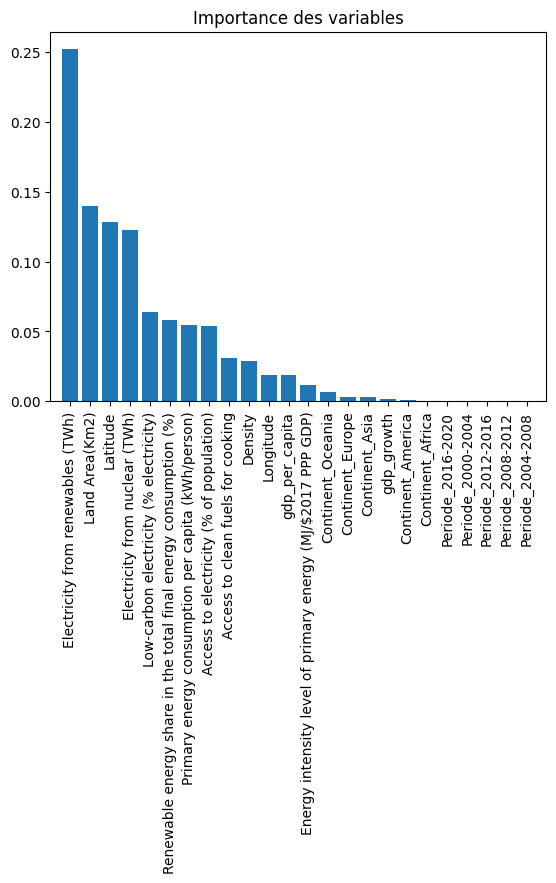

In [109]:
 # Graphe des importances
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1] 
plt.figure()
plt.title("Importance des variables")
plt.bar(range(Xr_train.shape[1]), importances[indices]);
plt.xticks(range(Xr_train.shape[1]), energy2.columns[indices],rotation=90);
plt.xlim([-1, Xr_train.shape[1]]);
plt.show()


MSE= 0.01746256297177108


<Figure size 640x480 with 0 Axes>

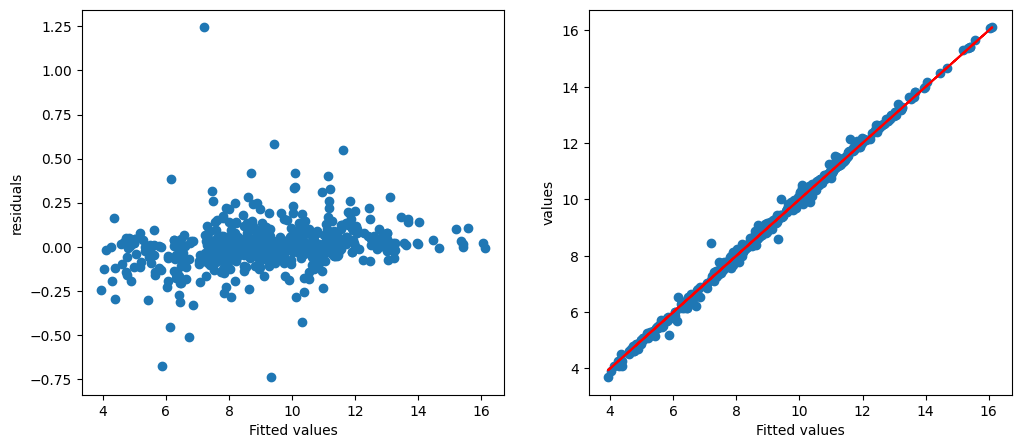

In [110]:
y_chap_rf = forest.predict(XTest)
rf_mse=mean_squared_error(y_chap_rf,YTest)
Mse_M["RandomForest"]=rf_mse
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_rf,YTest-y_chap_rf)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_rf,YTest)
plt.plot(y_chap_rf,y_chap_rf,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

**Conclusion**

**Les variables les plus importantes pour notre modèle Random Forest sont "Electricity from renewables (TWh)", "Land Area", et "Electricity from nuclear (TWh)". Cela signifie que la production d'électricité à partir de sources renouvelables, la latitude géographique et la production d'électricité nucléaire ont le plus grand impact sur nos prédictions.**

**En observant le graphique des résidus par rapport aux valeurs prédites, nous constatons une dispersion uniforme autour de zéro, ce qui indique que nos prédictions sont équilibrées et précises. De même, le graphique des valeurs prédites par rapport aux valeurs réelles montre une relation étroite, confirmant que notre modèle suit bien les tendances des données observées.**

**Enfin, notre MSE de 0,018 est relativement faible, ce qui confirme la pertinence et la précision de notre modèle pour prédire l'émission de C02**

### <span style="color:blue"> **III.E Réseaux de neurone**  </span>

In [111]:
 from sklearn.neural_network import MLPRegressor
    

In [112]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Définition de la grille des hyperparamètres
param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (15,), (20,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Initialisation de MLPRegressor
nnet = MLPRegressor(max_iter=2000)

# Utilisation de GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=nnet, param_grid=param_grid, cv=10, n_jobs=-1)
s=time.time()
# Entraînement du modèle
grid_search.fit(Xr_train, YTrain)

# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(Xr_test)

# Calcul de l'erreur quadratique moyenne
mse = mean_squared_error(YTest, y_pred)
end=time.time()
Time=end-s
Mse_M["NeuralNetwork"]=mse
Time_M["NeuralNetwork"]=Time
# Affichage des résultats
print("Mean Squared Error on Test Set:", mse)
print("Best parameters:", grid_search.best_params_)


Mean Squared Error on Test Set: 0.01996132099328037
Best parameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.01}


## <span style="color:blue"> **IV. Comparaison des méthodes**  </span>

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np



param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 3, 5],
    'min_samples_split': [2, 5, 10]
}


gbr = GradientBoostingRegressor(random_state=0, loss='squared_error')


grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(Xr_train, YTrain)

best_gbr = grid_search.best_estimator_

s=time.time()
y_pred = best_gbr.predict(Xr_test)
mse = mean_squared_error(YTest,y_pred)
Time=time.time()-s
Mse_M["Boosting"]=mse
Time_M["Boosting"]=Time
print(f"Best parameters : {grid_search.best_params_}")
print(f"Mean Squared Error : {mse}")


Best parameters : {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}
Mean Squared Error : 0.02692068388691564


<Figure size 640x480 with 0 Axes>

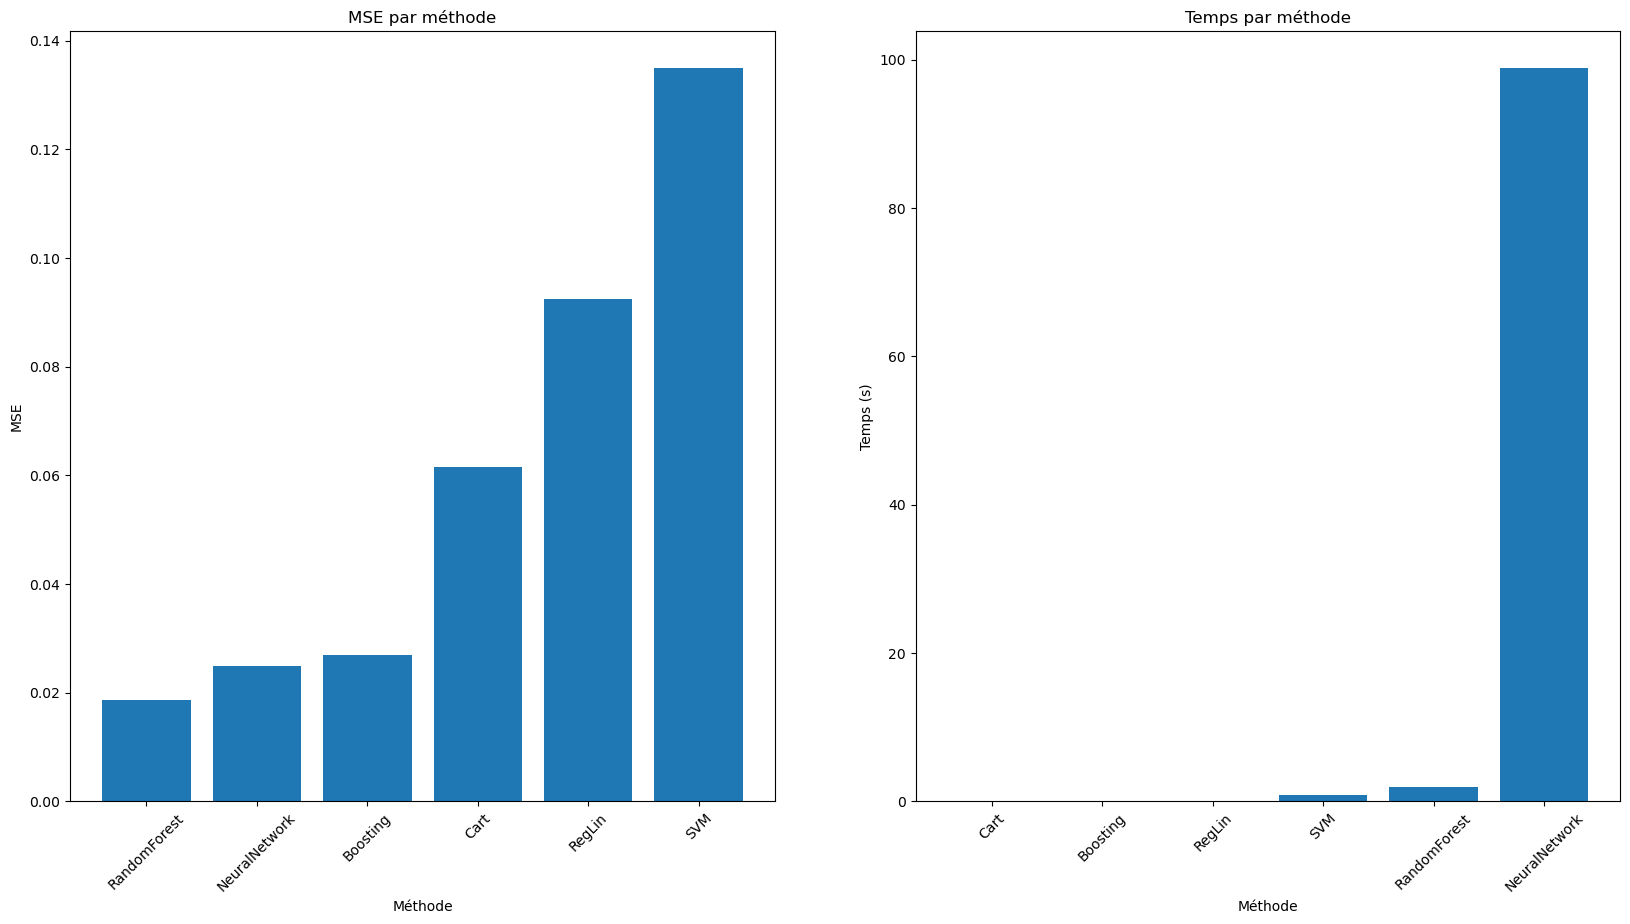

In [60]:

sorted_Mse_M = dict(sorted(Mse_M.items(), key=lambda item: item[1]))
sorted_Time_M = dict(sorted(Time_M.items(), key=lambda item: item[1]))



plt.figure()

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot MSE par méthode
ax[0].bar(sorted_Mse_M.keys(), sorted_Mse_M.values())
ax[0].set_title('MSE par méthode')
ax[0].set_xlabel('Méthode')
ax[0].set_ylabel('MSE')
ax[0].tick_params(axis='x', rotation=45)  # Correction ici

# Plot Temps par méthode
ax[1].bar(sorted_Time_M.keys(), sorted_Time_M.values())  # Correction ici
ax[1].set_title('Temps par méthode')
ax[1].set_xlabel('Méthode')
ax[1].set_ylabel('Temps (s)')
ax[1].tick_params(axis='x', rotation=45)  # Correction ici

plt.show()


**Ces résultats indiquent que le modèle RandomForest présente la MSE la plus basse, ce qui suggère qu'il effectue les prédictions les plus précises parmi les méthodes comparées. En revanche, le modèle NeuralNetwork présente une MSE légèrement plus élevée, suivie par CART et RegLin avec des MSE plus élevées encore.**

**En ce qui concerne le temps d'exécution, les modèles CART et RegLin sont les plus rapides, tandis que RandomForest nécessite considérablement plus de temps pour s'entraîner, suivi par NeuralNetwork qui nécessite le plus de temps.**

**Ces résultats mettent en évidence un compromis entre la précision des prédictions et le temps d'exécution. Bien que RandomForest produise les prédictions les plus précises, son temps d'entraînement est plus long. En revanche, les modèles plus simples comme CART et RegLin offrent des temps d'entraînement plus courts, mais au détriment de la précision des prédictions.**

### <span style="color:blue"> **V Modélisation avec les données manquantes**  </span>

#### <span style="color:blue"> **V.A Imputation des données manquantes**  </span>

In [113]:
energy3=pd.read_csv('global-data-on-sustainable-energy.csv')
energy3.head()


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [114]:

energy3.rename(columns={energy3.columns[17]: 'Density'}, inplace=True) #renommer la colonne Density pour faciliter l'accés à la variable
energy3['Density']= pd.to_numeric(energy3['Density'], errors='coerce')


In [115]:

energy3['Year']=energy3['Year'].astype(int)
# Définir les labels pour les catégories
bins = [2000, 2004, 2008, 2012, 2016]  
labels = ['2000-2004', '2004-2008', '2008-2012', '2012-2016']

# Transformer les années en periodes
energy3['Periode'] = pd.cut(energy3['Year'], bins=bins, labels=labels)
energy3['Periode'] = energy3['Periode'].astype('category')
energy3.drop(columns=['Year'],inplace=True)
energy3.head()

energy3['Continent']= coco.convert(names=energy3['Entity'], to='continent')

energy3.drop(['Entity'],axis=1, inplace=True)

In [116]:
# Prendre la racine carrée des colonnes spécifiques
columns_sqrt = ["Access to electricity (% of population)",
                "Access to clean fuels for cooking",
                "Renewable energy share in the total final energy consumption (%)",
                "Electricity from nuclear (TWh)","Primary energy consumption per capita (kWh/person)",
                "Electricity from renewables (TWh)",
                "Low-carbon electricity (% electricity)"]
energy3[columns_sqrt] = np.sqrt(energy3[columns_sqrt])

# Prendre le logarithme des colonnes spécifiques
columns_log = ["gdp_per_capita",
               "Density",
               "Land Area(Km2)","Value_co2_emissions_kt_by_country",]
energy3[columns_log] = np.log(energy3[columns_log])

#Nous isolons la variable à prédire, 

#energy3.drop(["Value_co2_emissions_kt_by_country"],axis=1,inplace=True)

#Nous enlecons les variables quantitatives qui ont beaucoup de NaN
energy3.drop(["Renewable-electricity-generating-capacity-per-capita","Financial flows to developing countries (US $)","Renewables (% equivalent primary energy)"],axis=1,inplace=True)
energy3.drop(['Electricity from fossil fuels (TWh)'],axis=1,inplace=True)

In [117]:
#On retire les variables qualitatives
energyQuant3=energy3.drop(["Periode","Continent"],axis=1)

##### <span style="color:blue"> **V.A.1 Imputation simple**  </span>

In [118]:
from sklearn.impute import SimpleImputer

energyQuant_mean = SimpleImputer().fit_transform(energyQuant3)


In [119]:
energyQuant_meanImp=pd.DataFrame(energyQuant_mean, columns=energyQuant3.columns)
energyQuant_meanImp.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,1.270272,2.489980,6.707459,0.0,0.556776,8.121419,17.395253,1.64,6.633318,3.441610,8.441109,4.094345,13.388153,33.93911,67.709953
1,2.018557,2.683282,6.752777,0.0,0.707107,9.205746,15.391291,1.74,6.593045,3.441610,8.441109,4.094345,13.388153,33.93911,67.709953
2,3.067435,2.863564,6.150610,0.0,0.748331,9.008853,14.521093,1.40,6.937314,3.441610,5.189766,4.094345,13.388153,33.93911,67.709953
3,3.839076,3.082207,6.054750,0.0,0.793725,8.186653,15.164703,1.40,7.106606,8.832278,5.250617,4.094345,13.388153,33.93911,67.709953
4,4.479394,3.301515,6.651316,0.0,0.748331,7.932298,14.290950,1.20,6.937314,1.414118,5.353667,4.094345,13.388153,33.93911,67.709953


##### <span style="color:blue"> **V.A.2 Imputation avec KNN**  </span>

In [120]:
from sklearn.impute import  KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
energyQuant_kNN = knn_imputer.fit_transform(energyQuant3)

In [121]:
energyQuant_kNNImp=pd.DataFrame(energyQuant_kNN,columns=energyQuant3.columns)
energyQuant_kNNImp.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,1.270272,2.489980,6.707459,0.0,0.556776,8.121419,17.395253,1.64,6.633318,8.131967,5.371611,4.094345,13.388153,33.93911,67.709953
1,2.018557,2.683282,6.752777,0.0,0.707107,9.205746,15.391291,1.74,6.593045,8.131967,5.371611,4.094345,13.388153,33.93911,67.709953
2,3.067435,2.863564,6.150610,0.0,0.748331,9.008853,14.521093,1.40,6.937314,8.131967,5.189766,4.094345,13.388153,33.93911,67.709953
3,3.839076,3.082207,6.054750,0.0,0.793725,8.186653,15.164703,1.40,7.106606,8.832278,5.250617,4.094345,13.388153,33.93911,67.709953
4,4.479394,3.301515,6.651316,0.0,0.748331,7.932298,14.290950,1.20,6.937314,1.414118,5.353667,4.094345,13.388153,33.93911,67.709953


##### <span style="color:blue"> **V.A.3 Imputation avec Missforest**  </span>

In [122]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [123]:
estimator_rf = ExtraTreesRegressor(n_estimators=20, random_state=0)
energyQuant_rf = IterativeImputer(estimator=estimator_rf, random_state=0, max_iter=300,tol=4e-2).fit_transform(energyQuant3)

In [124]:
energyQuant_rfIMp=pd.DataFrame(energyQuant_rf,columns=energyQuant3.columns)
energyQuant_rfIMp.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,1.270272,2.489980,6.707459,0.0,0.556776,8.121419,17.395253,1.64,6.633318,6.445210,5.615926,4.094345,13.388153,33.93911,67.709953
1,2.018557,2.683282,6.752777,0.0,0.707107,9.205746,15.391291,1.74,6.593045,7.105904,5.377825,4.094345,13.388153,33.93911,67.709953
2,3.067435,2.863564,6.150610,0.0,0.748331,9.008853,14.521093,1.40,6.937314,7.682694,5.189766,4.094345,13.388153,33.93911,67.709953
3,3.839076,3.082207,6.054750,0.0,0.793725,8.186653,15.164703,1.40,7.106606,8.832278,5.250617,4.094345,13.388153,33.93911,67.709953
4,4.479394,3.301515,6.651316,0.0,0.748331,7.932298,14.290950,1.20,6.937314,1.414118,5.353667,4.094345,13.388153,33.93911,67.709953


In [125]:
def set(data,dataquant):
    Value_CO2=dataquant["Value_co2_emissions_kt_by_country"]
    dataquant2=dataquant.drop(["Value_co2_emissions_kt_by_country"],axis=1,)
    dataDum1=pd.get_dummies(data[['Periode','Continent']])
    df= pd.concat([dataDum1, dataquant2], axis=1) 
    scaler = StandardScaler()   
    XTrain, XTest, YTrain, YTest = train_test_split(df,Value_CO2 , test_size=0.2, random_state=11)
    scaler.fit(XTrain)
    Xr_train = scaler.transform(XTrain)
    
    Xr_test = scaler.transform(XTest)
    return Xr_train,Xr_test,YTrain,YTest


    

#### <span style="color:blue"> **V.B Prédiction avec les données imputées**  </span>

#### <span style="color:blue"> **V.B.1 Avec la méthode Simple**  </span>

In [131]:
Xr_train,Xr_test,YTrain, YTest=set(energy3,energyQuant_meanImp)

Mse_Missed={}

#### <span style="color:blue"> **a. Regression Linéaire**  </span>

In [132]:
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)

# Making predictions on the testing set
y_chap = regLin.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, y_chap)
R2=r2_score(YTest,y_chap)
Mse_Missed["reglin_simple"]=mse
print("MSE =", mse)
print("R2 =",R2)

MSE = 0.804932183834996
R2 = 0.8455318717211038


#### <span style="color:blue"> **b. Regression Linéaire avec Lasso**  </span>

In [134]:
param=[{"alpha":[0,0.05,0.1,0.2,0.3,50,500,1000,1500]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, YTrain)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.849723, Meilleur paramètre = {'alpha': 0}


#### <span style="color:blue"> **c. SVM**  </span>

In [135]:
from sklearn.svm import SVR
inputY=energyQuant_meanImp["Value_co2_emissions_kt_by_country"]
inputX=energyQuant_meanImp.drop(["Value_co2_emissions_kt_by_country"],axis=1)
XTr_svm, XT_svm, YTr_svm, YT_svm = train_test_split(inputX, inputY, test_size=0.2, random_state=11)
scaler.fit(XTr_svm)
Xr_train_svm = scaler.transform(XTr_svm)

Xr_test_svm = scaler.transform(XT_svm)

In [136]:
param = {'degree': [2, 3, 4,5,6]}  # Range of C and degree values to try
svm = GridSearchCV(SVR(epsilon=0.1, kernel='poly'), param_grid=param, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Best parameters
print("Best score = %f, Best parameters = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))

Best score = 0.129912, Best parameters = {'degree': 3}


In [137]:
y_chap=svmOpt.predict(Xr_test_svm)
mse = mean_squared_error(YT_svm, y_chap)
Mse_Missed["SVM simple"]=mse

#### <span style="color:blue"> **d. Cart**  </span>

In [138]:
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,18))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.049520, Meilleur paramètre = {'max_depth': 14}


In [139]:
y_chap_= treeOpt.predict(Xr_test)
mse=mean_squared_error(y_chap_,YTest)

Mse_Missed["CART_Simple"]=mse
print("MSE=",mse)


MSE= 0.13037700514773076


#### <span style="color:blue"> **e. Réseaux de neurones**  </span>

In [140]:
param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (15,), (20,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Initialisation de MLPRegressor
nnet = MLPRegressor(max_iter=2000)

# Utilisation de GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=nnet, param_grid=param_grid, cv=10, n_jobs=-1)

# Entraînement du modèle
grid_search.fit(Xr_train, YTrain)

# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(Xr_test)

# Calcul de l'erreur quadratique moyenne
mse = mean_squared_error(YTest, y_pred)

Mse_Missed["NeuralNetwork Simple"]=mse

# Affichage des résultats
print("Mean Squared Error on Test Set:", mse)
print("Best parameters:", grid_search.best_params_)


Mean Squared Error on Test Set: 0.2390101666872592
Best parameters: {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.01}


#### <span style="color:blue"> **f. Random Forest**  </span>

In [142]:
param=[{"max_features":list(range(2,20,2))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.025917, Meilleur paramètre = {'max_features': 14}


In [143]:
y_chap = rfOpt.predict(Xr_test)
rf_mse=mean_squared_error(y_chap,YTest)
Mse_Missed["Random Forest simple"]=mse
print("MSE=",rf_mse)


MSE= 0.08551452756800151


#### <span style="color:blue"> **V.B.2 Avec la méthode KNN**  </span>

In [144]:
Xr_train,Xr_test,YTrain, YTest=set(energy3,energyQuant_kNNImp)

##### <span style="color:blue"> **a. Regression Linéaire**  </span>

In [145]:
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)

# Making predictions on the testing set
y_chap = regLin.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, y_chap)
R2=r2_score(YTest,y_chap)
Mse_Missed["reglin knn"]=mse
print("MSE =", mse)
print("R2 =",R2)

MSE = 0.6081209383566435
R2 = 0.8983777322773898


##### <span style="color:blue"> **b. Regression Linéaire avec Lasso**  </span>

In [146]:
param=[{"alpha":[0,0.05,0.1,0.2,0.3,50,500,1000,1500]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, YTrain)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.910710, Meilleur paramètre = {'alpha': 0}


##### <span style="color:blue"> **c. SVM**  </span>

In [148]:
inputY=energyQuant_kNNImp["Value_co2_emissions_kt_by_country"]
inputX=energyQuant_kNNImp.drop(["Value_co2_emissions_kt_by_country"],axis=1)
XTr_svm, XT_svm, YTr_svm, YT_svm = train_test_split(inputX, inputY, test_size=0.2, random_state=11)
scaler.fit(XTr_svm)
Xr_train_svm = scaler.transform(XTr_svm)

Xr_test_svm = scaler.transform(XT_svm)

In [149]:
param = {'degree': [2, 3, 4,5,6]}  # Range of C and degree values to try
svm = GridSearchCV(SVR(epsilon=0.1, kernel='poly'), param_grid=param, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Best parameters
print("Best score = %f, Best parameters = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))

y_chap=svmOpt.predict(Xr_test_svm)
mse = mean_squared_error(YT_svm, y_chap)
Mse_Missed["SVM knn"]=mse

Best score = 0.103674, Best parameters = {'degree': 3}


##### <span style="color:blue"> **d. CART**  </span>

In [150]:
param=[{"max_depth":list(range(2,18))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.015098, Meilleur paramètre = {'max_depth': 13}


In [151]:
y_chap_= treeOpt.predict(Xr_test)
mse=mean_squared_error(y_chap_,YTest)
Mse_Missed["CART knn"]=mse
print("MSE=",mse)


MSE= 0.15984203411779083


##### <span style="color:blue"> **e. Random Forest**  </span>

In [152]:
param=[{"max_features":list(range(2,20,2))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.005877, Meilleur paramètre = {'max_features': 10}


In [153]:
y_chap = rfOpt.predict(Xr_test)
rf_mse=mean_squared_error(y_chap,YTest)
Mse_Missed["random forest knn"]=mse
print("MSE=",rf_mse)


MSE= 0.050954595455659536


##### <span style="color:blue"> **f. Réseaux de neurones**  </span>

In [154]:
param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (15,), (20,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Initialisation de MLPRegressor
nnet = MLPRegressor(max_iter=2000)

# Utilisation de GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=nnet, param_grid=param_grid, cv=10, n_jobs=-1)

# Entraînement du modèle
grid_search.fit(Xr_train, YTrain)

# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(Xr_test)

# Calcul de l'erreur quadratique moyenne
mse = mean_squared_error(YTest, y_pred)

Mse_Missed["NeuralNetwork Knn"]=mse

# Affichage des résultats
print("Mean Squared Error on Test Set:", mse)
print("Best parameters:", grid_search.best_params_)


Mean Squared Error on Test Set: 0.0999072653240682
Best parameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.01}


#### <span style="color:blue"> **V.B.3 Avec la méthode MissForest**  </span>

In [155]:
Xr_train,Xr_test,YTrain, YTest=set(energy3,energyQuant_rfIMp)

##### <span style="color:blue"> **a. Regression Linéaire**  </span>

In [156]:
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)

# Making predictions on the testing set
y_chap = regLin.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, y_chap)
R2=r2_score(YTest,y_chap)

print("MSE =", mse)
print("R2 =",R2)

MSE = 0.23092916988252188
R2 = 0.9600412719848991


In [157]:
y_chap = regLin.predict(Xr_test)
mse=mean_squared_error(y_chap,YTest)
Mse_Missed["reglin missforest"]=mse
print("MSE=",rf_mse)


MSE= 0.050954595455659536


##### <span style="color:blue"> **a. Regression Linéaire avec Lasso**  </span>

In [158]:
param=[{"alpha":[0,0.05,0.1,0.2,0.3,50,500,1000,1500]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, YTrain)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.962108, Meilleur paramètre = {'alpha': 0}


##### <span style="color:blue"> **c. SVM**  </span>

In [159]:
inputY=energyQuant_rfIMp["Value_co2_emissions_kt_by_country"]
inputX=energyQuant_rfIMp.drop(["Value_co2_emissions_kt_by_country"],axis=1)
XTr_svm, XT_svm, YTr_svm, YT_svm = train_test_split(inputX, inputY, test_size=0.2, random_state=11)
scaler.fit(XTr_svm)
Xr_train_svm = scaler.transform(XTr_svm)

Xr_test_svm = scaler.transform(XT_svm)

In [160]:
param = {'degree': [2, 3, 4,5,6]}  # Range of C and degree values to try
svm = GridSearchCV(SVR(epsilon=0.1, kernel='poly'), param_grid=param, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Best parameters
print("Best score = %f, Best parameters = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))

Best score = 0.076140, Best parameters = {'degree': 3}


In [161]:
y_chap=svmOpt.predict(Xr_test_svm)
mse = mean_squared_error(YT_svm, y_chap)
Mse_Missed["SVM missforext"]=mse

##### <span style="color:blue"> **d. CART**  </span>

In [162]:
param=[{"max_depth":list(range(2,18))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.011042, Meilleur paramètre = {'max_depth': 15}


MSE= 0.052987564172742606


<Figure size 640x480 with 0 Axes>

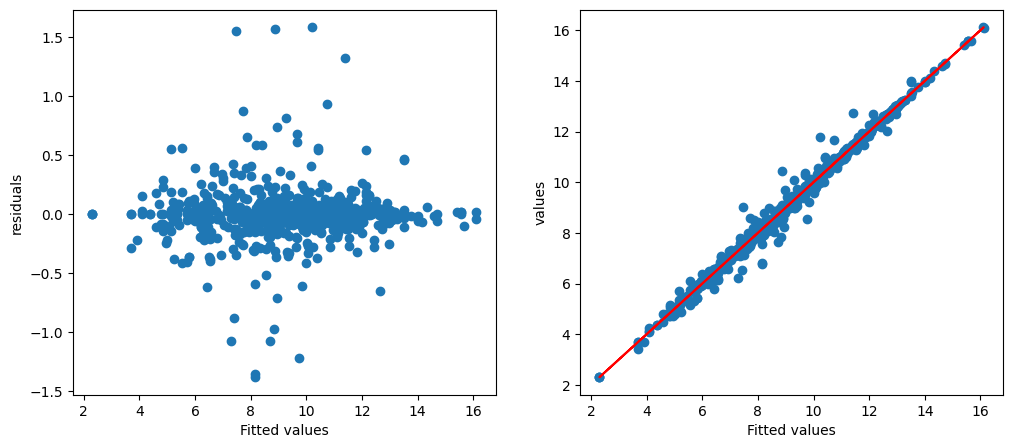

In [163]:
y_chap_= treeOpt.predict(Xr_test)
mse=mean_squared_error(y_chap_,YTest)
Mse_Missed["CART missforest"]=mse
print("MSE=",mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_,YTest-y_chap_)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_,YTest)
plt.plot(y_chap_,y_chap_,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **e. Random Forest**  </span>

In [164]:
param=[{"max_features":list(range(2,20,2))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.003233, Meilleur paramètre = {'max_features': 10}


MSE= 0.011349735063421367


<Figure size 640x480 with 0 Axes>

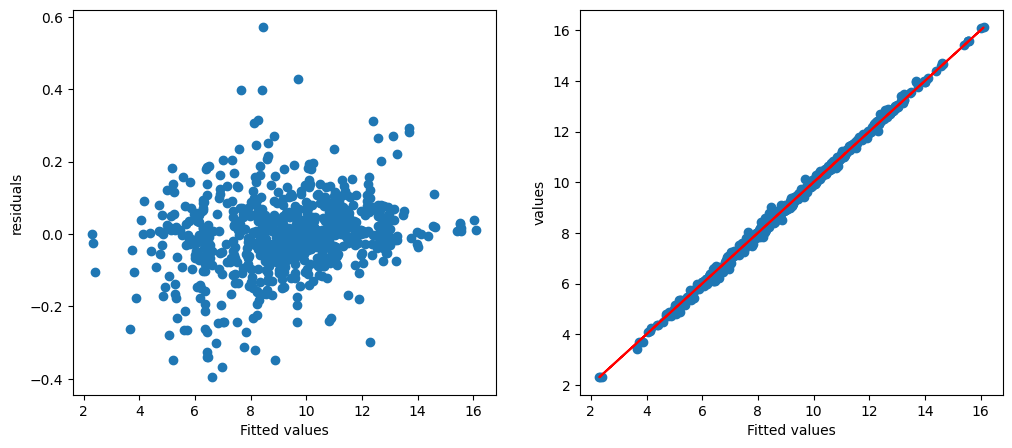

In [165]:
y_chap = rfOpt.predict(Xr_test)
rf_mse=mean_squared_error(y_chap,YTest)
Mse_Missed["Random forest missforest"]=mse
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')


plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **f.Réseau de Neurones**  </span>

In [166]:
param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (15,), (20,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Initialisation de MLPRegressor
nnet = MLPRegressor(max_iter=2000)

# Utilisation de GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=nnet, param_grid=param_grid, cv=10, n_jobs=-1)

# Entraînement du modèle
grid_search.fit(Xr_train, YTrain)

# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(Xr_test)

# Calcul de l'erreur quadratique moyenne
mse = mean_squared_error(YTest, y_pred)

Mse_Missed["NeuralNetwor missforest"]=mse

# Affichage des résultats
print("Mean Squared Error on Test Set:", mse)
print("Best parameters:", grid_search.best_params_)


Mean Squared Error on Test Set: 0.029966252148307525
Best parameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.01}


#### <span style="color:blue"> **V.C Comparaison**  </span>

In [169]:
Mse_Missed

{'reglin_simple': 0.804932183834996,
 'SVM simple': 0.5429955703256908,
 'CART_Simple': 0.13037700514773076,
 'NeuralNetwork Simple': 0.2390101666872592,
 'Random Forest simple': 0.2390101666872592,
 'reglin knn': 0.6081209383566435,
 'SVM knn': 0.5292307594524137,
 'CART knn': 0.15984203411779083,
 'random forest knn': 0.15984203411779083,
 'NeuralNetwork Knn': 0.0999072653240682,
 'reglin missforest': 0.23092916988252188,
 'SVM missforext': 0.24545431793061637,
 'CART missforest': 0.052987564172742606,
 'Random forest missforest': 0.052987564172742606,
 'NeuralNetwor missforest': 0.029966252148307525}

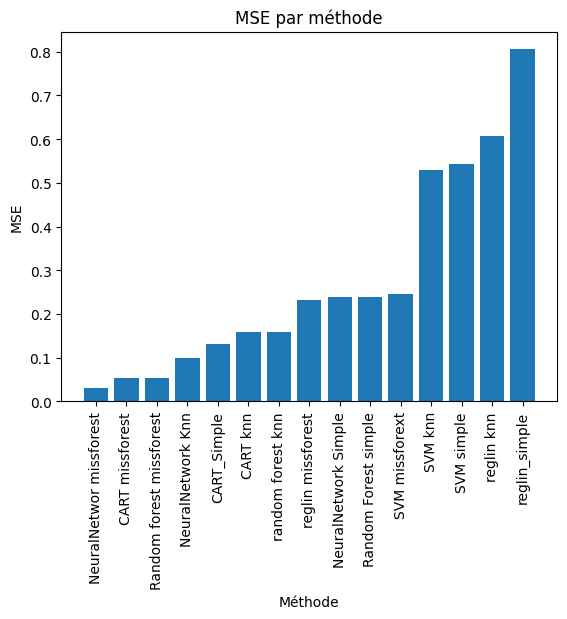

In [172]:
sorted_Mse_M = dict(sorted(Mse_Missed.items(), key=lambda item: item[1]))

plt.figure()

# Plot MSE par méthode
plt.bar(sorted_Mse_M.keys(), sorted_Mse_M.values())
plt.title('MSE par méthode')
plt.xlabel('Méthode')
plt.ylabel('MSE')
plt.tick_params(axis='x', rotation=90)  # Correction ici

**Les résultats des MSE** montrent que les modèles **Neural Network** avec l'imputation **missForest** ont la MSE la plus basse, suivis de près par les modèles **CART** et **Random Forest** également avec l'imputation **missForest**. Cela suggère que l'imputation missForest fonctionne bien avec ces types de modèles.

En revanche, les modèles **CART** et **Random Forest** avec une imputation simple, ainsi que les modèles **CART** et **Random Forest** avec l'imputation kNN, présentent des MSE légèrement plus élevées, mais restent relativement proches.

Les modèles de **régression linéaire**, qu'ils soient associés à l'imputation **missForest** ou à l'imputation kNN, présentent les MSE les plus élevées parmi toutes les combinaisons de méthodes d'imputation et de modèles.

En résumé, l'imputation **missForest** semble être la plus efficace pour améliorer la précision des prédictions, en particulier pour les modèles **Neural Network**, suivie de l'imputation kNN et de l'imputation simple. Les résultats les moins satisfaisants sont obtenus avec la **régression linéaire**, indépendamment de la méthode d'imputation utilisée.**


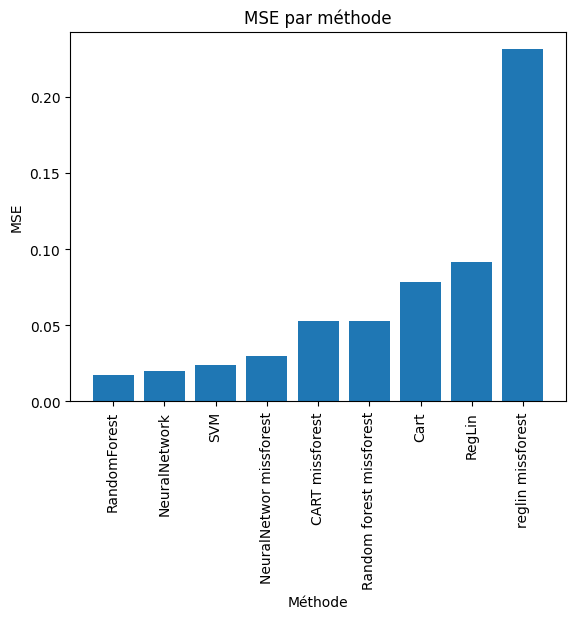

In [174]:
missforest_results = {k: v for k, v in Mse_Missed.items() if 'missforest' in k}
concatenated_dict = missforest_results.copy()
concatenated_dict.update(Mse_M)
sorted_Mse_M = dict(sorted(concatenated_dict.items(), key=lambda item: item[1]))
plt.figure()

# Plot MSE par méthode
plt.bar(sorted_Mse_M.keys(), sorted_Mse_M.values())
plt.title('MSE par méthode')
plt.xlabel('Méthode')
plt.ylabel('MSE')
plt.tick_params(axis='x', rotation=90)  # Correction ici

### <span style="color:blue"> Conclusion

**Notre étude du jeu de données "Energy" a révélé les facteurs influençant les émissions de CO2 de 176 pays entre 2000 et 2020. En testant divers modèles d'apprentissage automatique, tels que les modèles linéaires, les SVM, les arbres de décision (CART), Random Forest, les réseaux de neurones et le Boosting, nous avons identifié les variables les plus significatives pour prédire les émissions de CO2 par pays. Parmi tous les modèles évalués, Random Forest s'est avéré le plus précis, indépendamment de la présence de données manquantes.**